In [40]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.pylab as pylab
import matplotlib as mpl
import h5py
from astropy.time import Time
import astropy.units as u
params = {'legend.fontsize': 'large',
          'axes.labelsize': 'large',
          'axes.titlesize':'x-large'}
pylab.rcParams.update(params)
mpl.rcParams["figure.dpi"]= 300


In [2]:
def load_hdf5_to_dict(filename):
    """
    Load an HDF5 file into a dictionary of nested dictionaries.

    Args:
    - filename: The name of the HDF5 file to load from.

    Returns:
    - A dictionary of nested dictionaries.
    """
    with h5py.File(filename, "r") as f:
        return _load_hdf5_to_dict(f, "/")

def _load_hdf5_to_dict(f, name):
    """
    Helper function for load_hdf5_to_dict.
    Recursively loads nested dictionaries from an HDF5 file.

    Args:
    - f: The HDF5 file object.
    - name: The name of the HDF5 group to load.

    Returns:
    - A dictionary of nested dictionaries.
    """
    dic = {}
    for key in f[name].keys():
        if isinstance(f[name + key], h5py.Group):
            dic[key] = _load_hdf5_to_dict(f, name + key + "/")
        else:
            dic[key] = f[name + key][()]
    return dic

In [3]:
home_path = os.getcwd()
path_to_plots = os.path.join(home_path, "plots")
path_to_prop = os.path.join(home_path, "trail_properties")
path_to_hillas = os.path.join(home_path, "hillas_parameter")
#alternative:
path_to_hillas =  os.path.join(home_path,"hillas_parameter_log")

hfile = h5py.File(os.path.join(home_path, "hessall.h5"), "r")
runnumbers = np.array(hfile["run"])
hfile.close()
hillas_params = os.listdir(path_to_hillas)

In [41]:
data_bright = load_hdf5_to_dict("data_bright.h5")
data_dim = load_hdf5_to_dict("data_dim.h5")

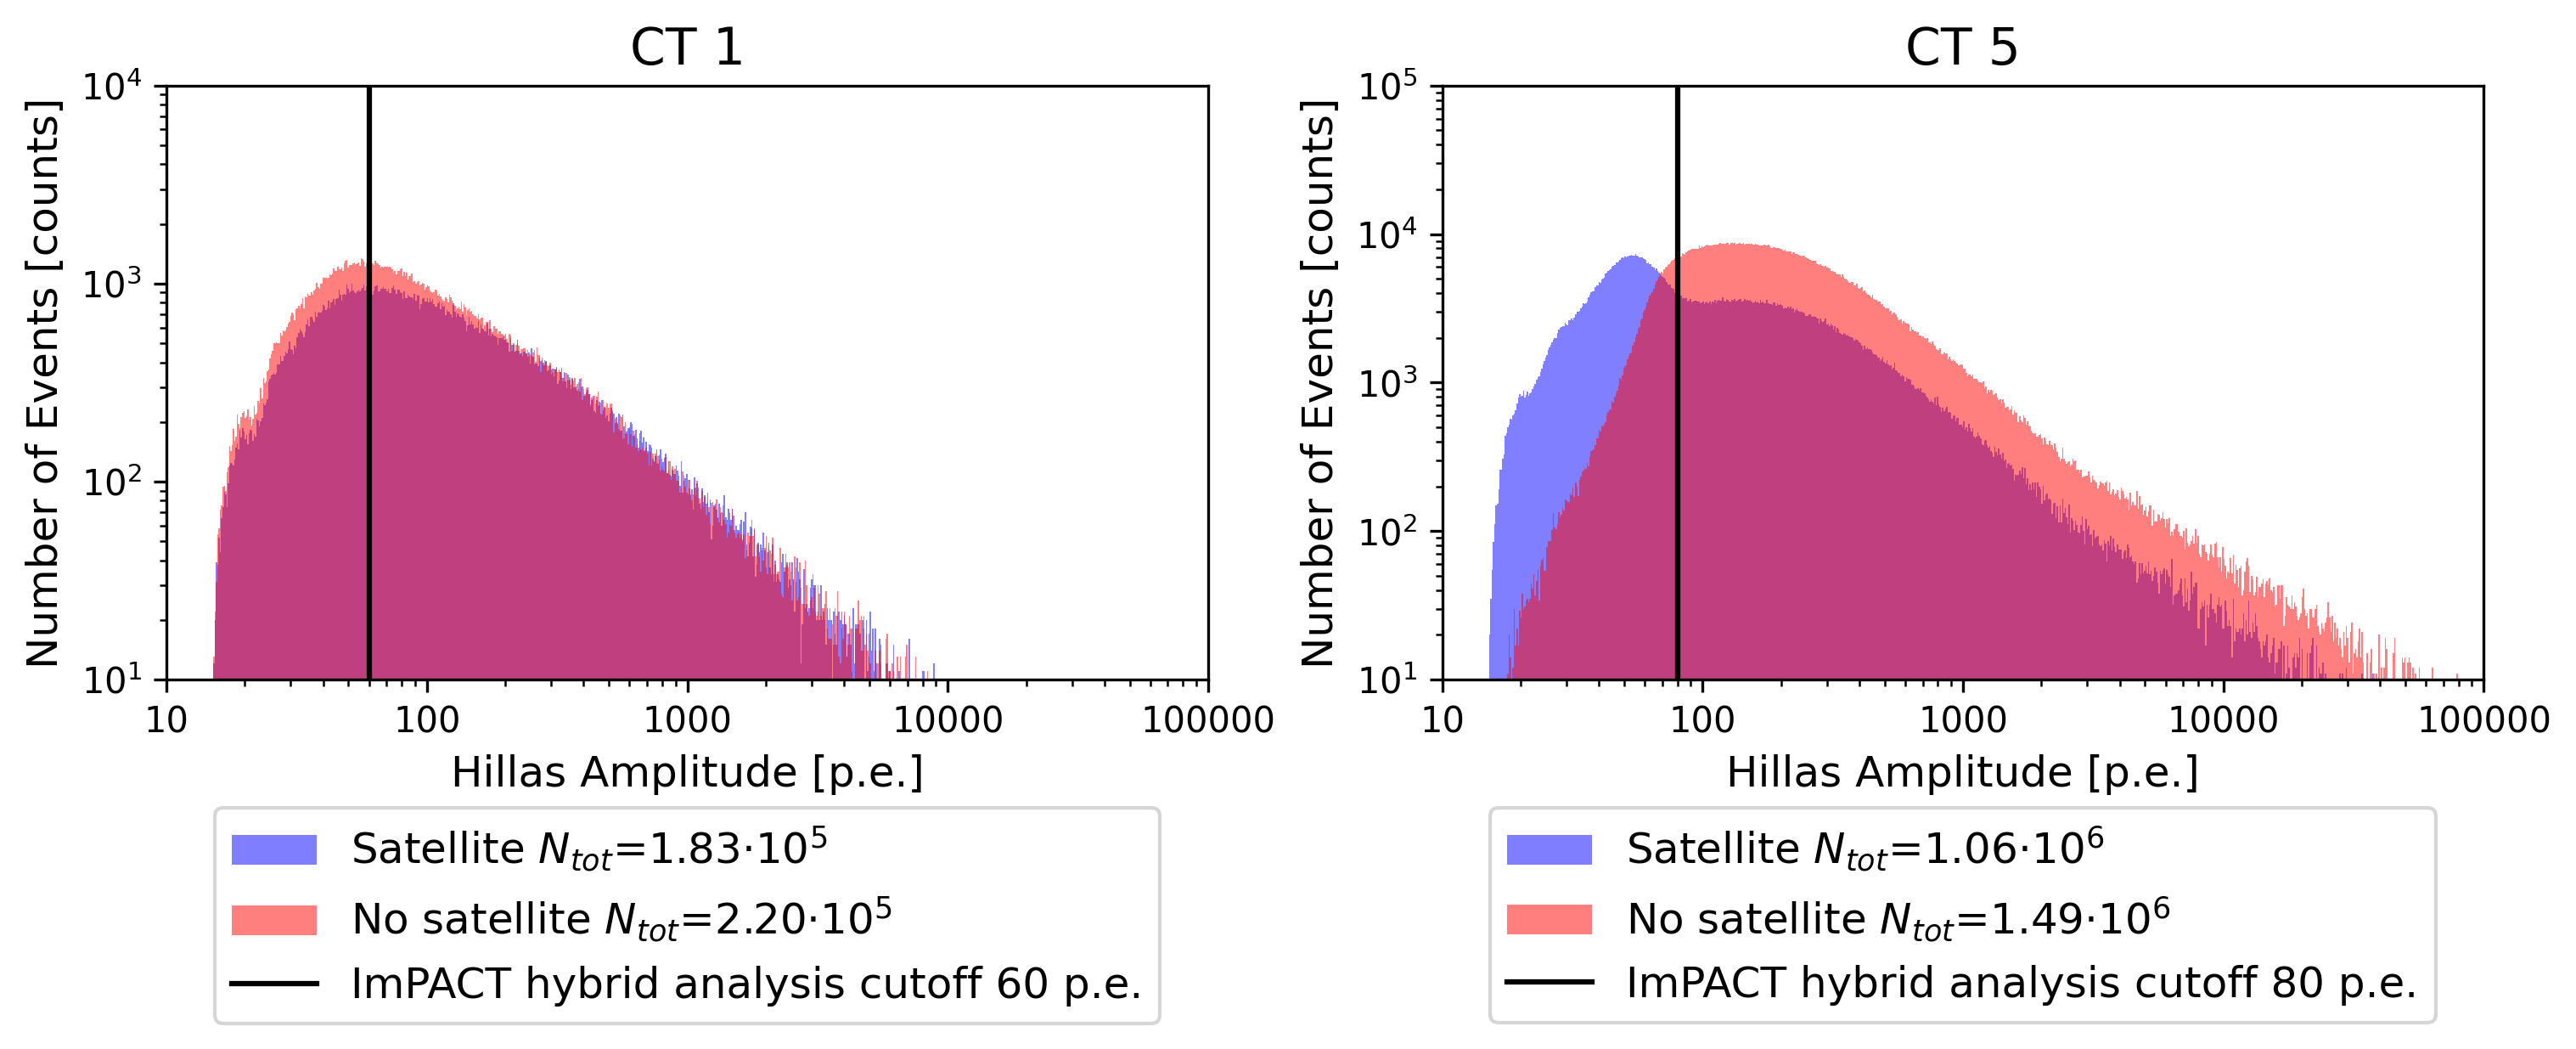

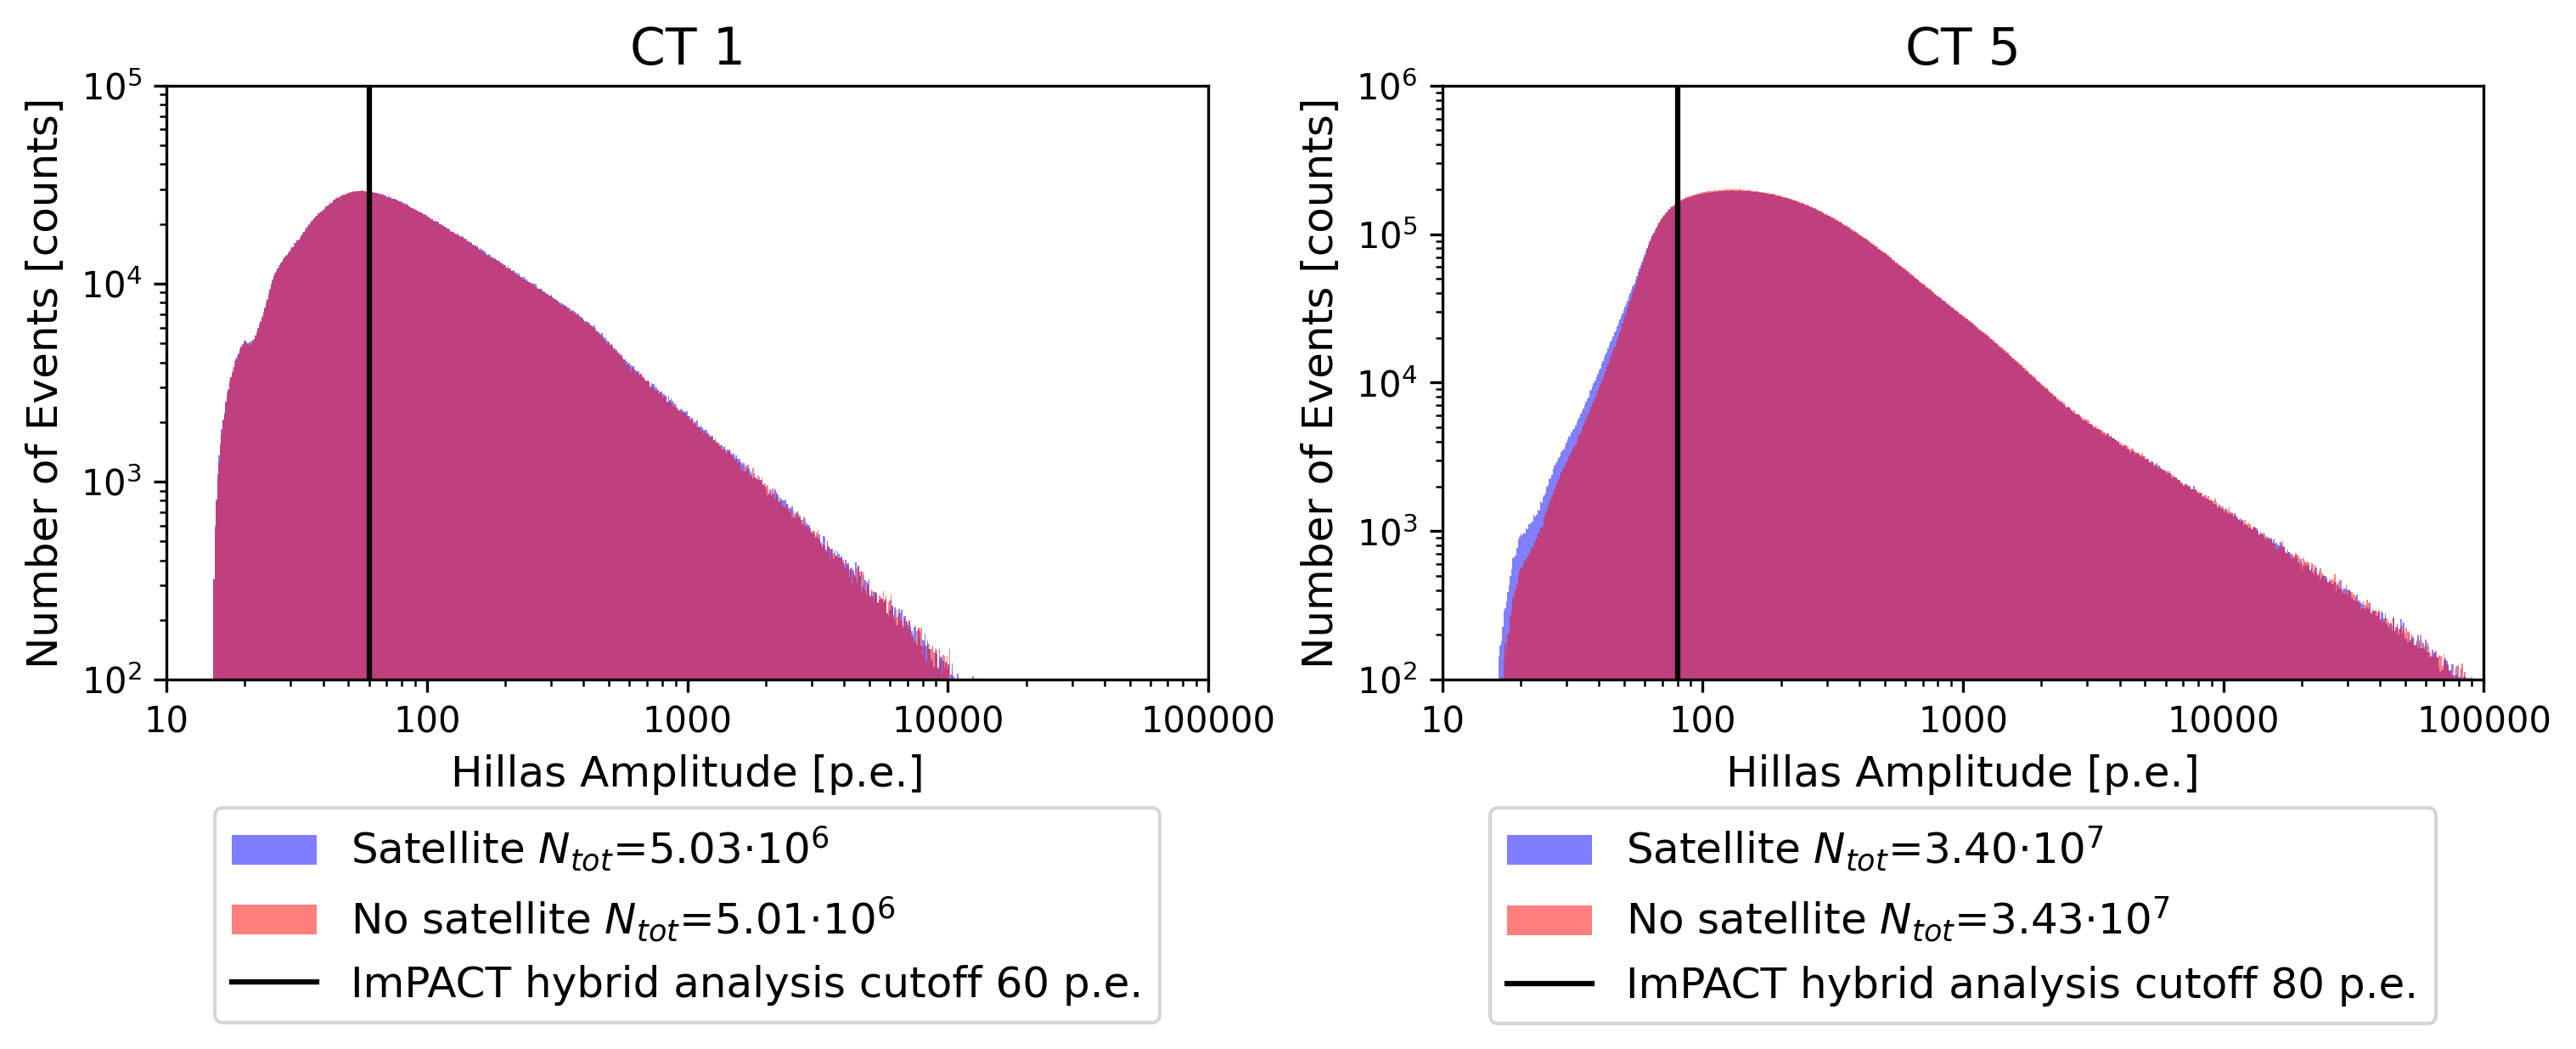

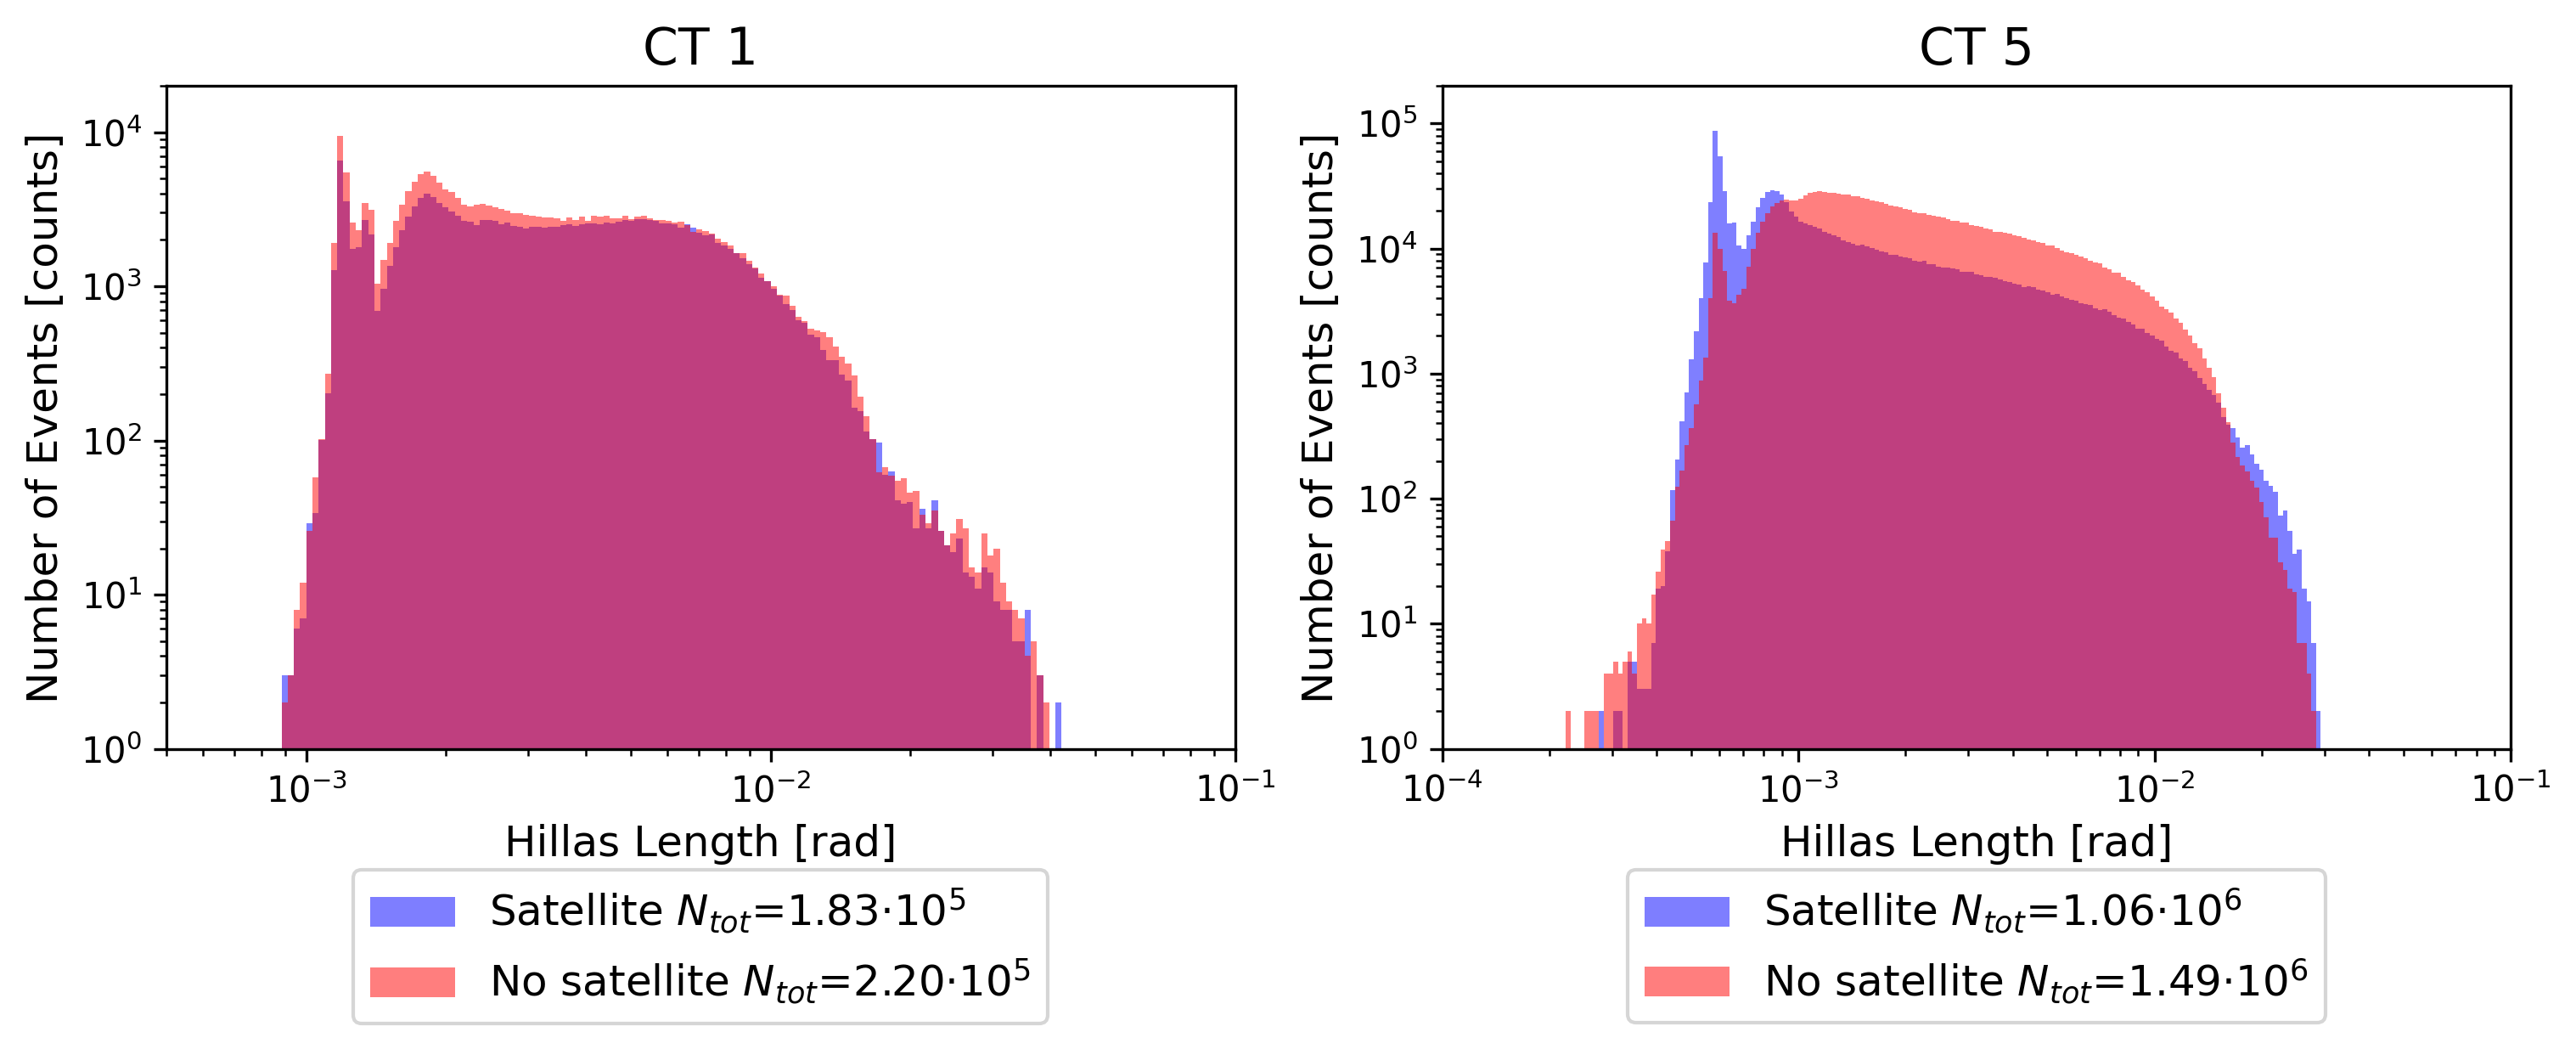

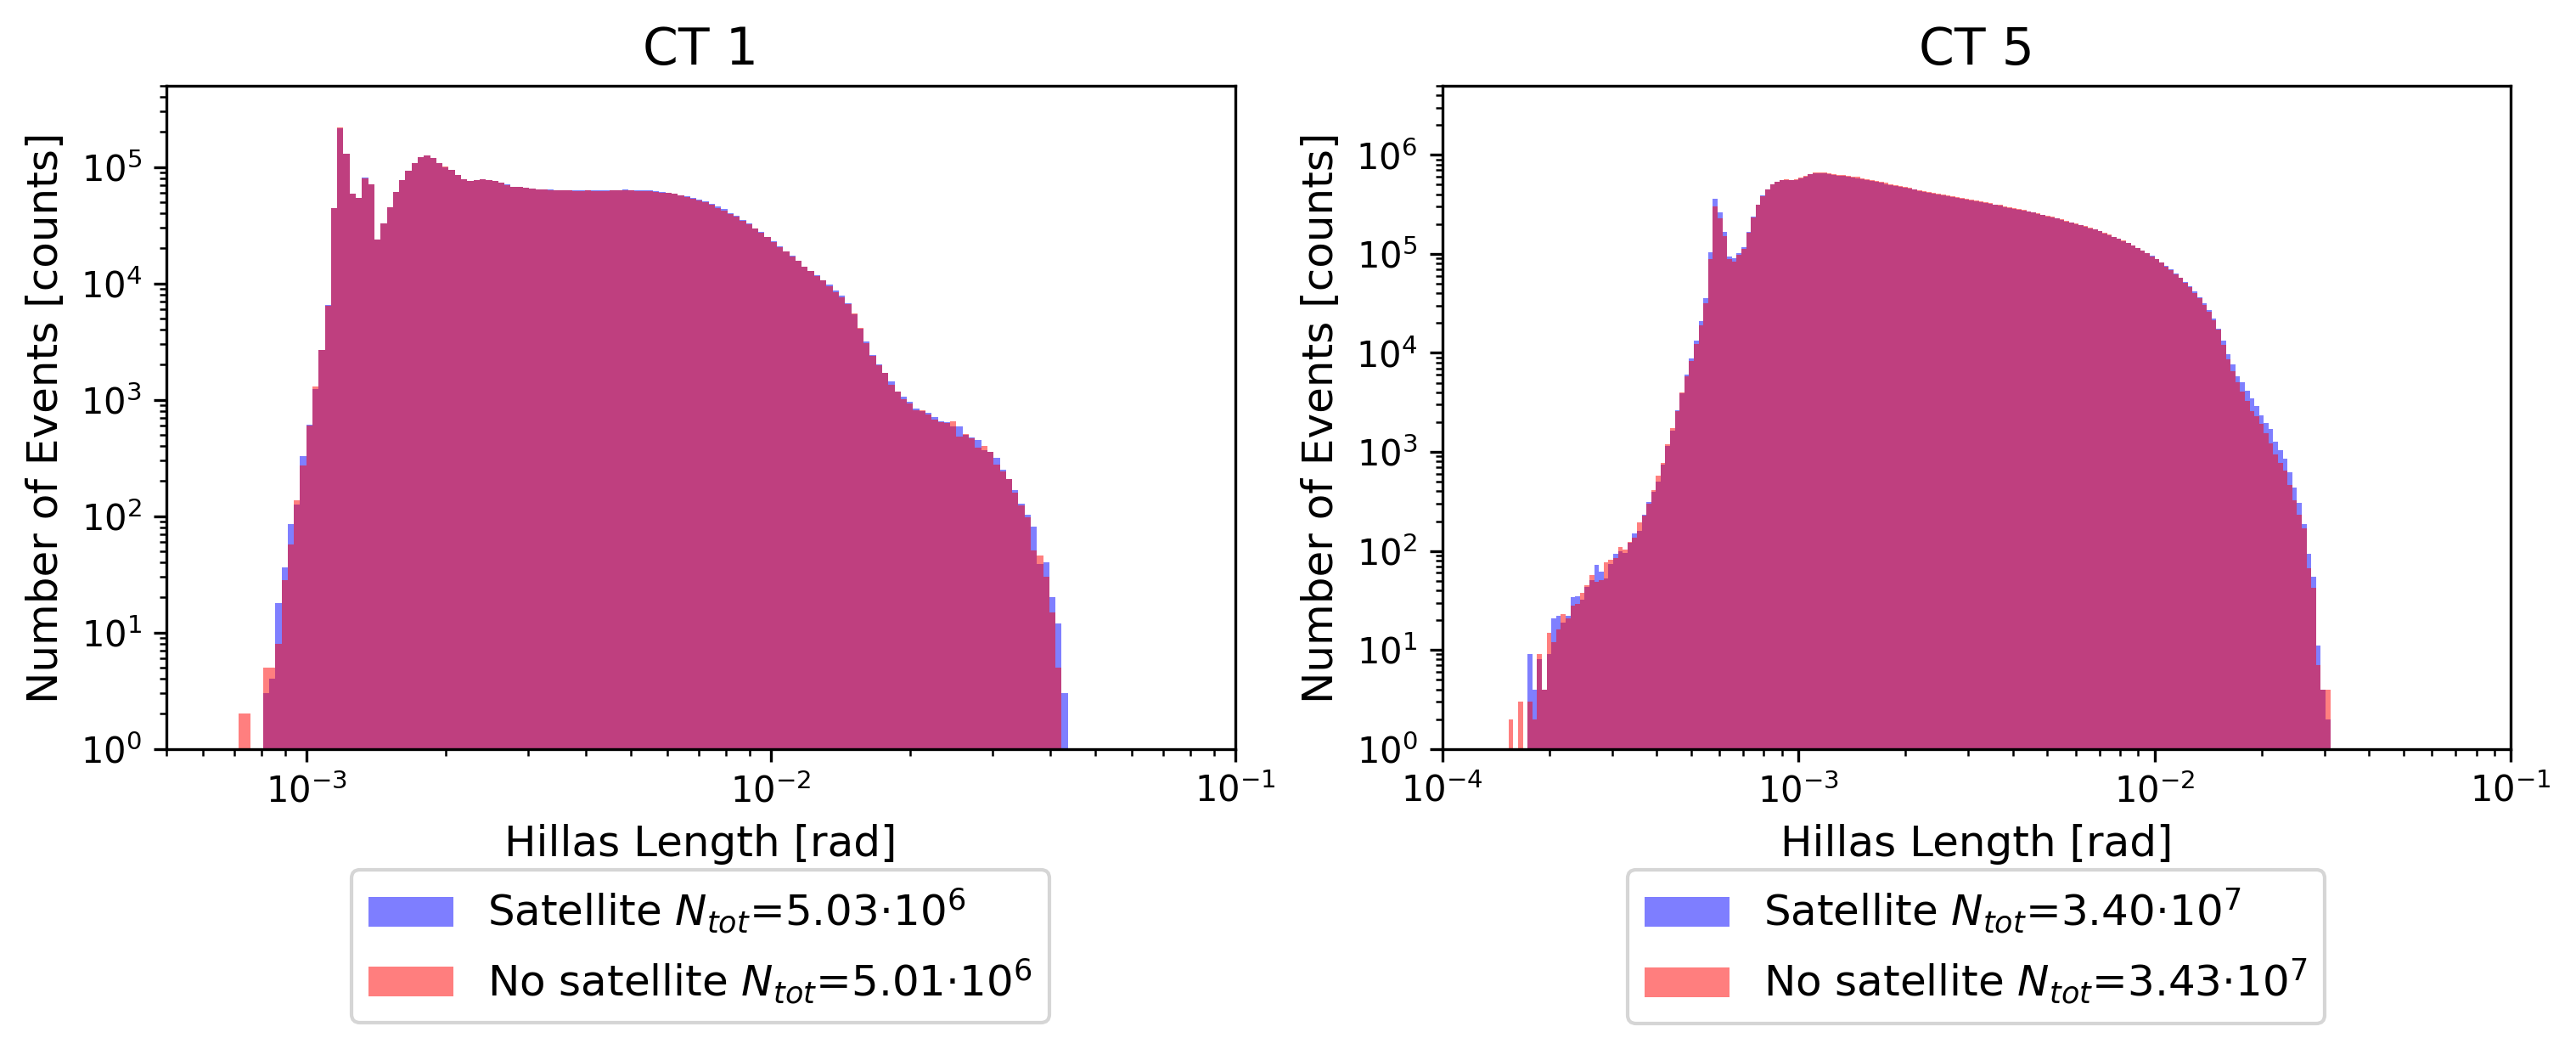

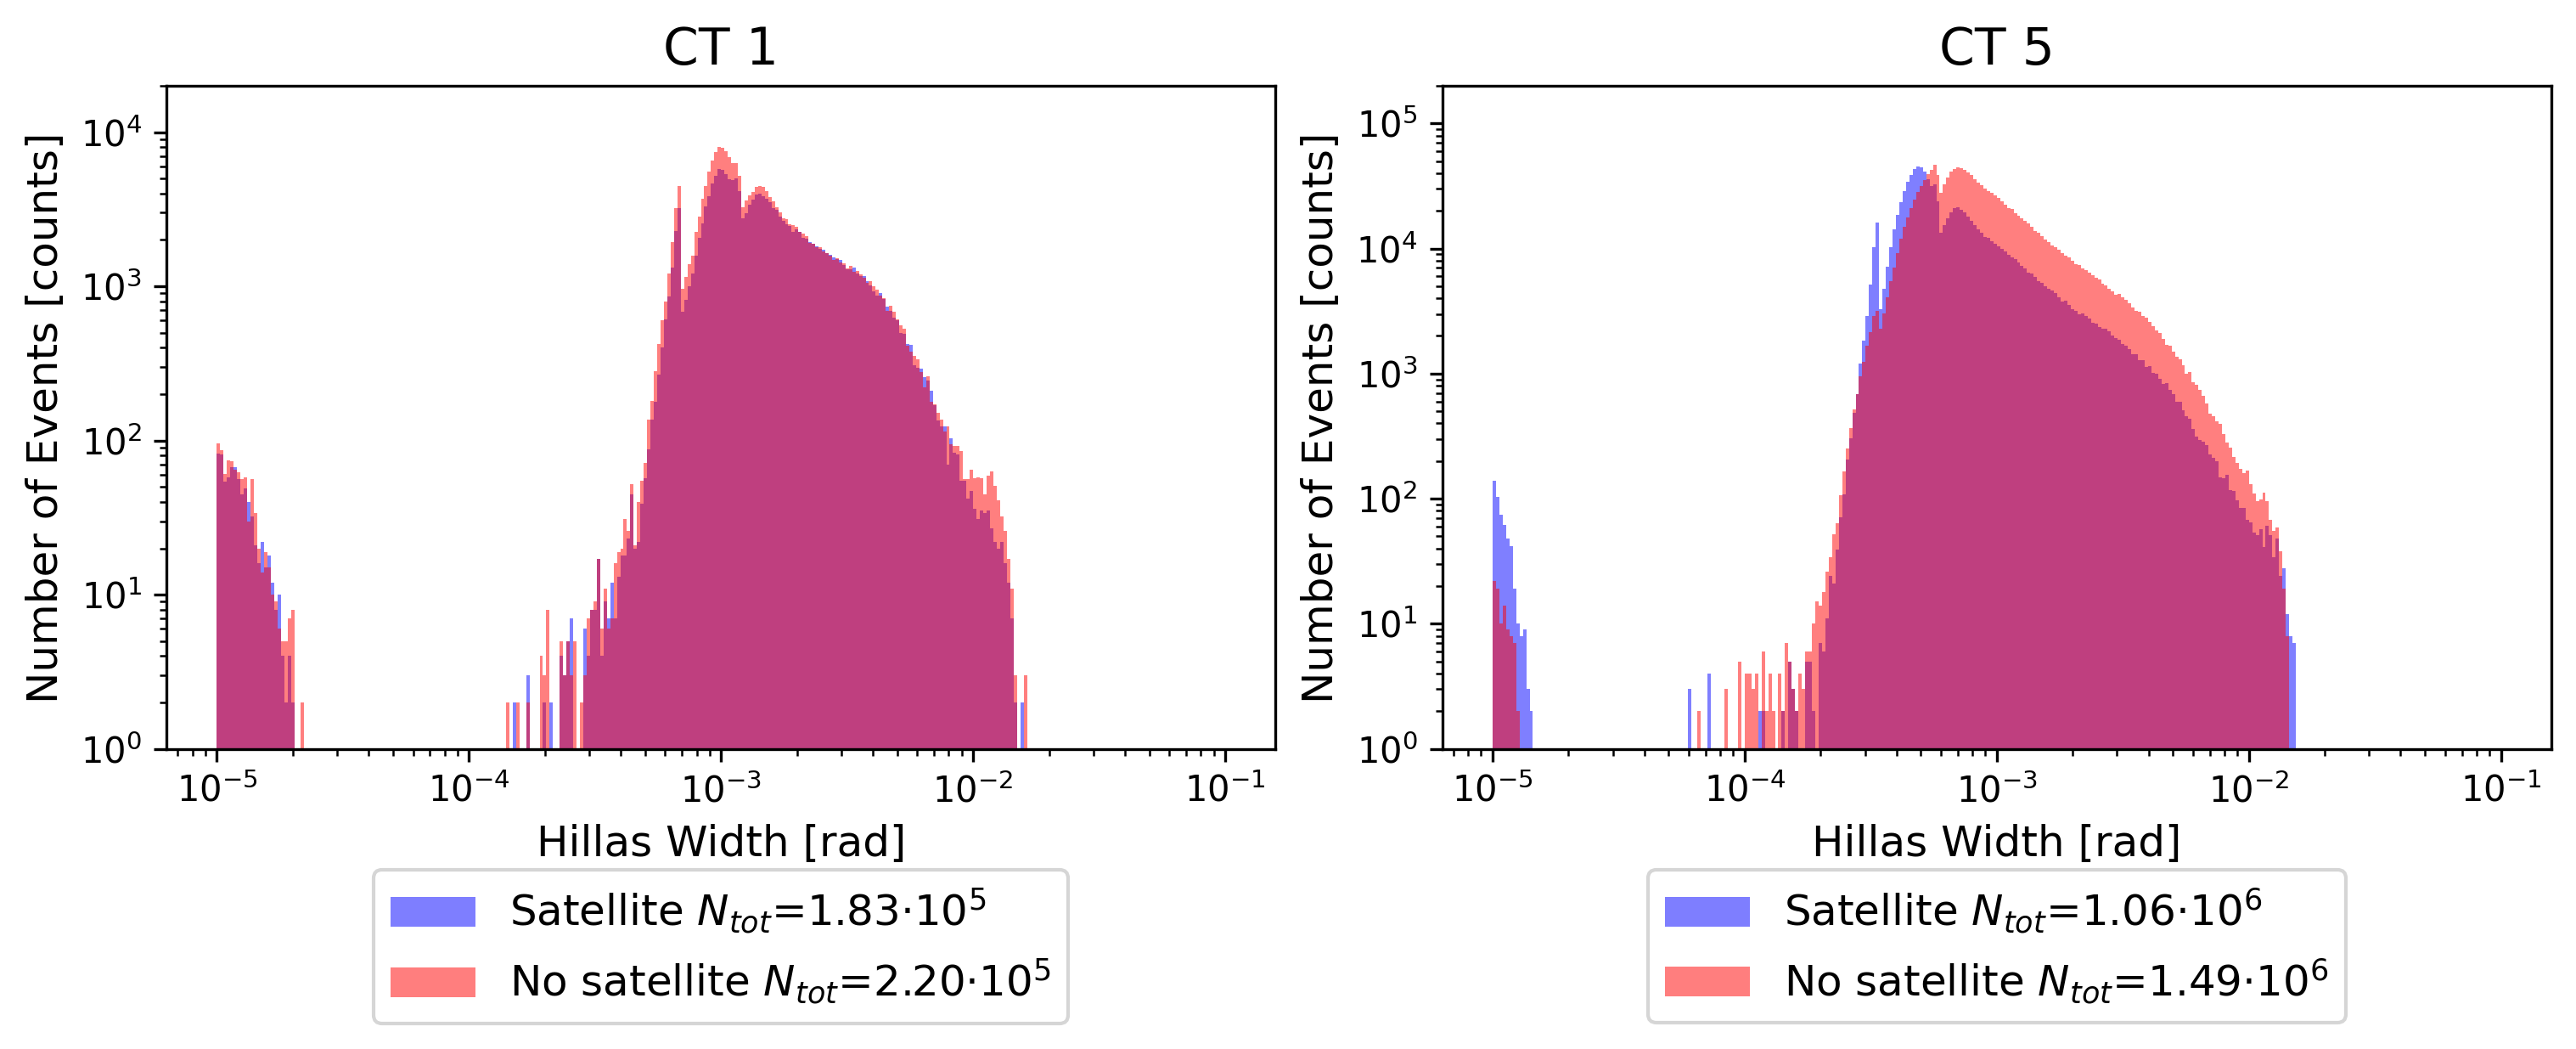

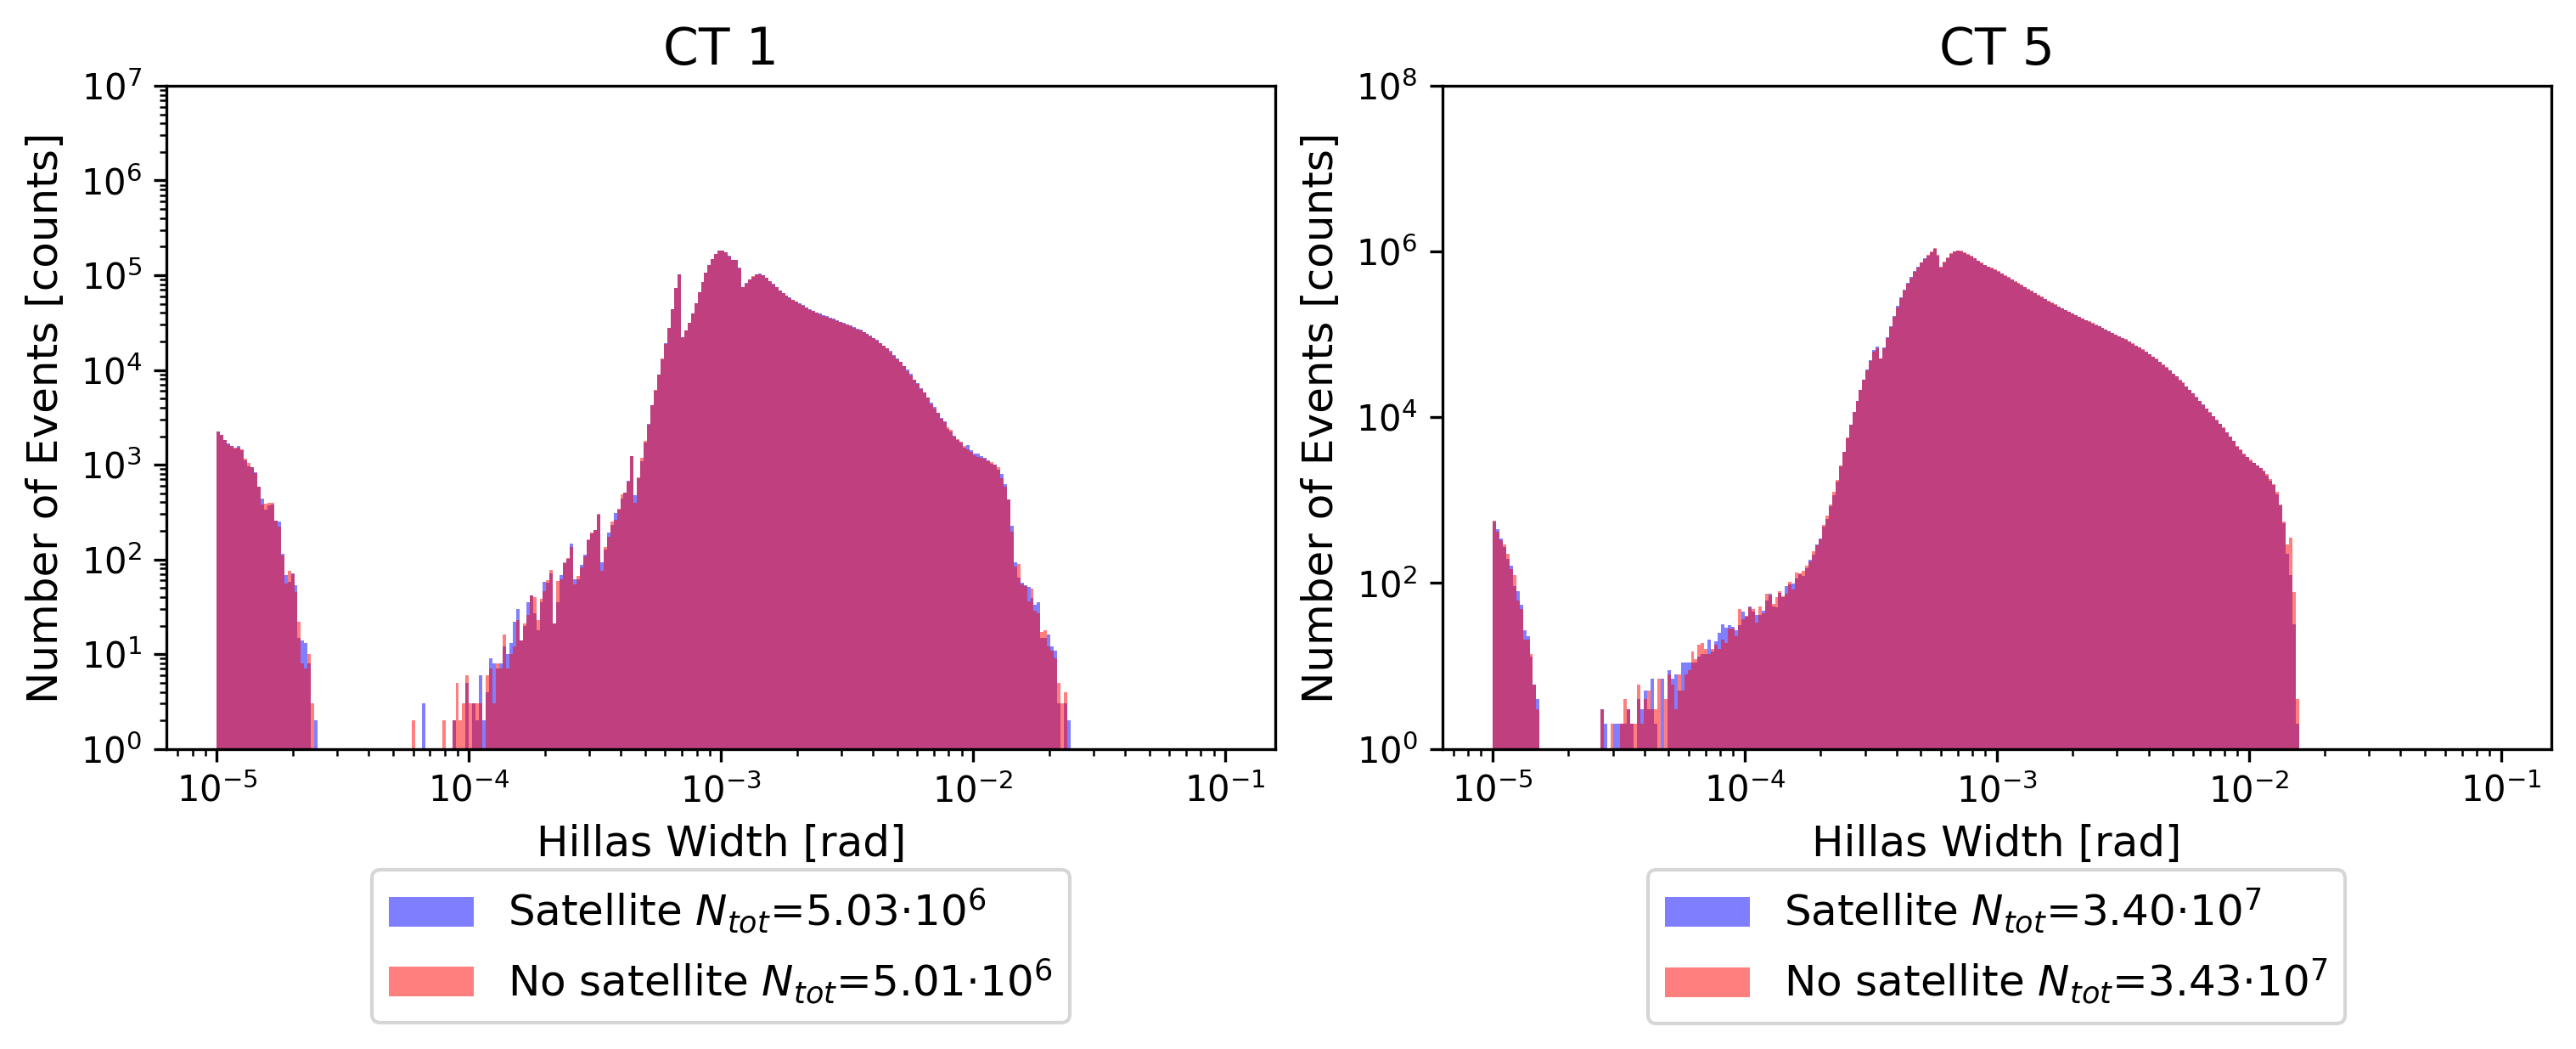

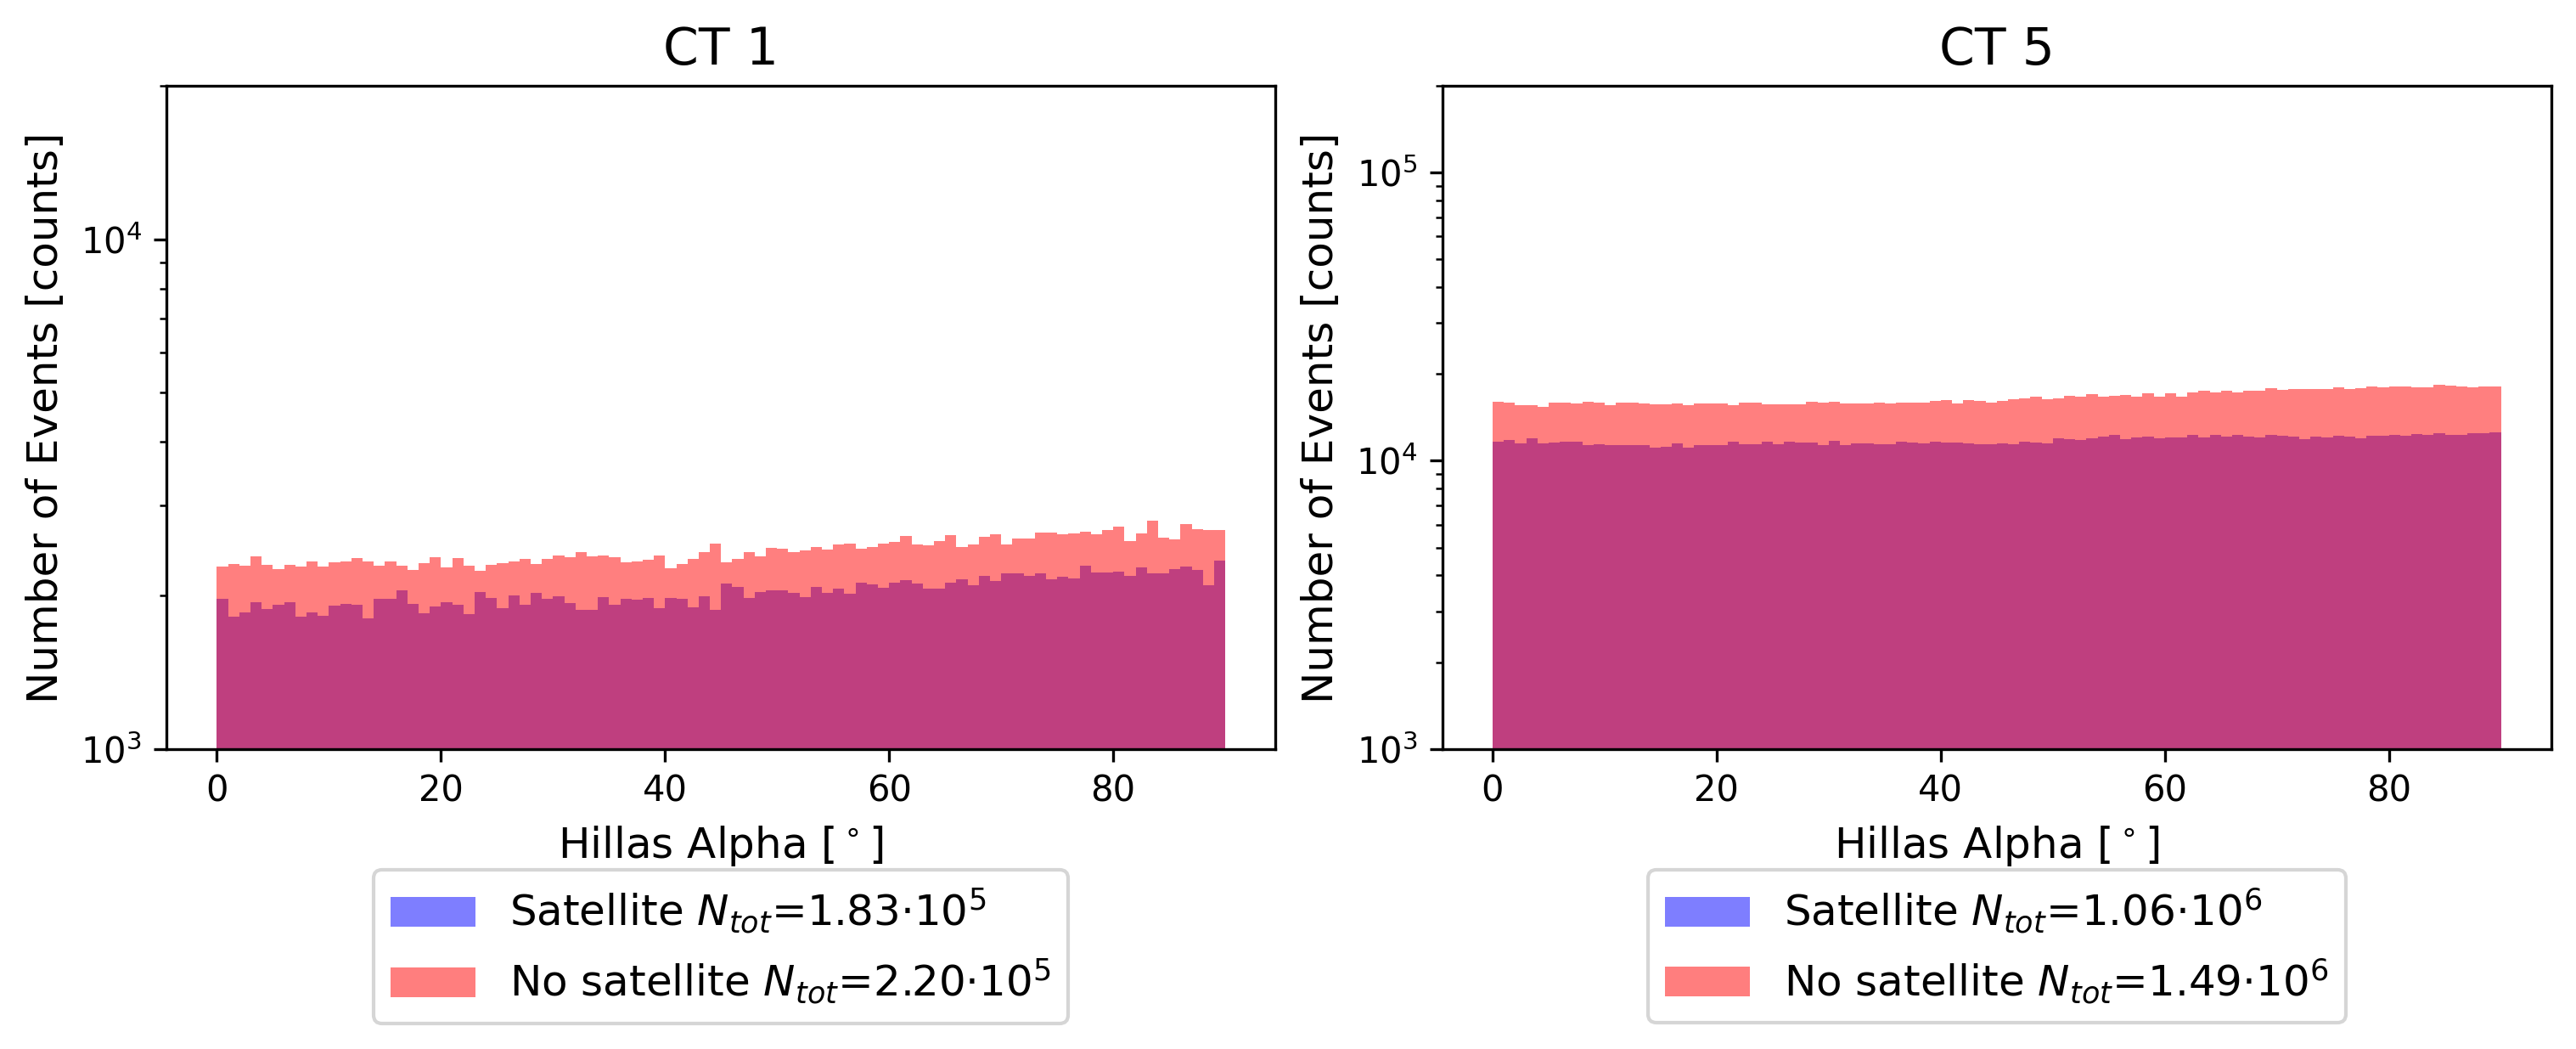

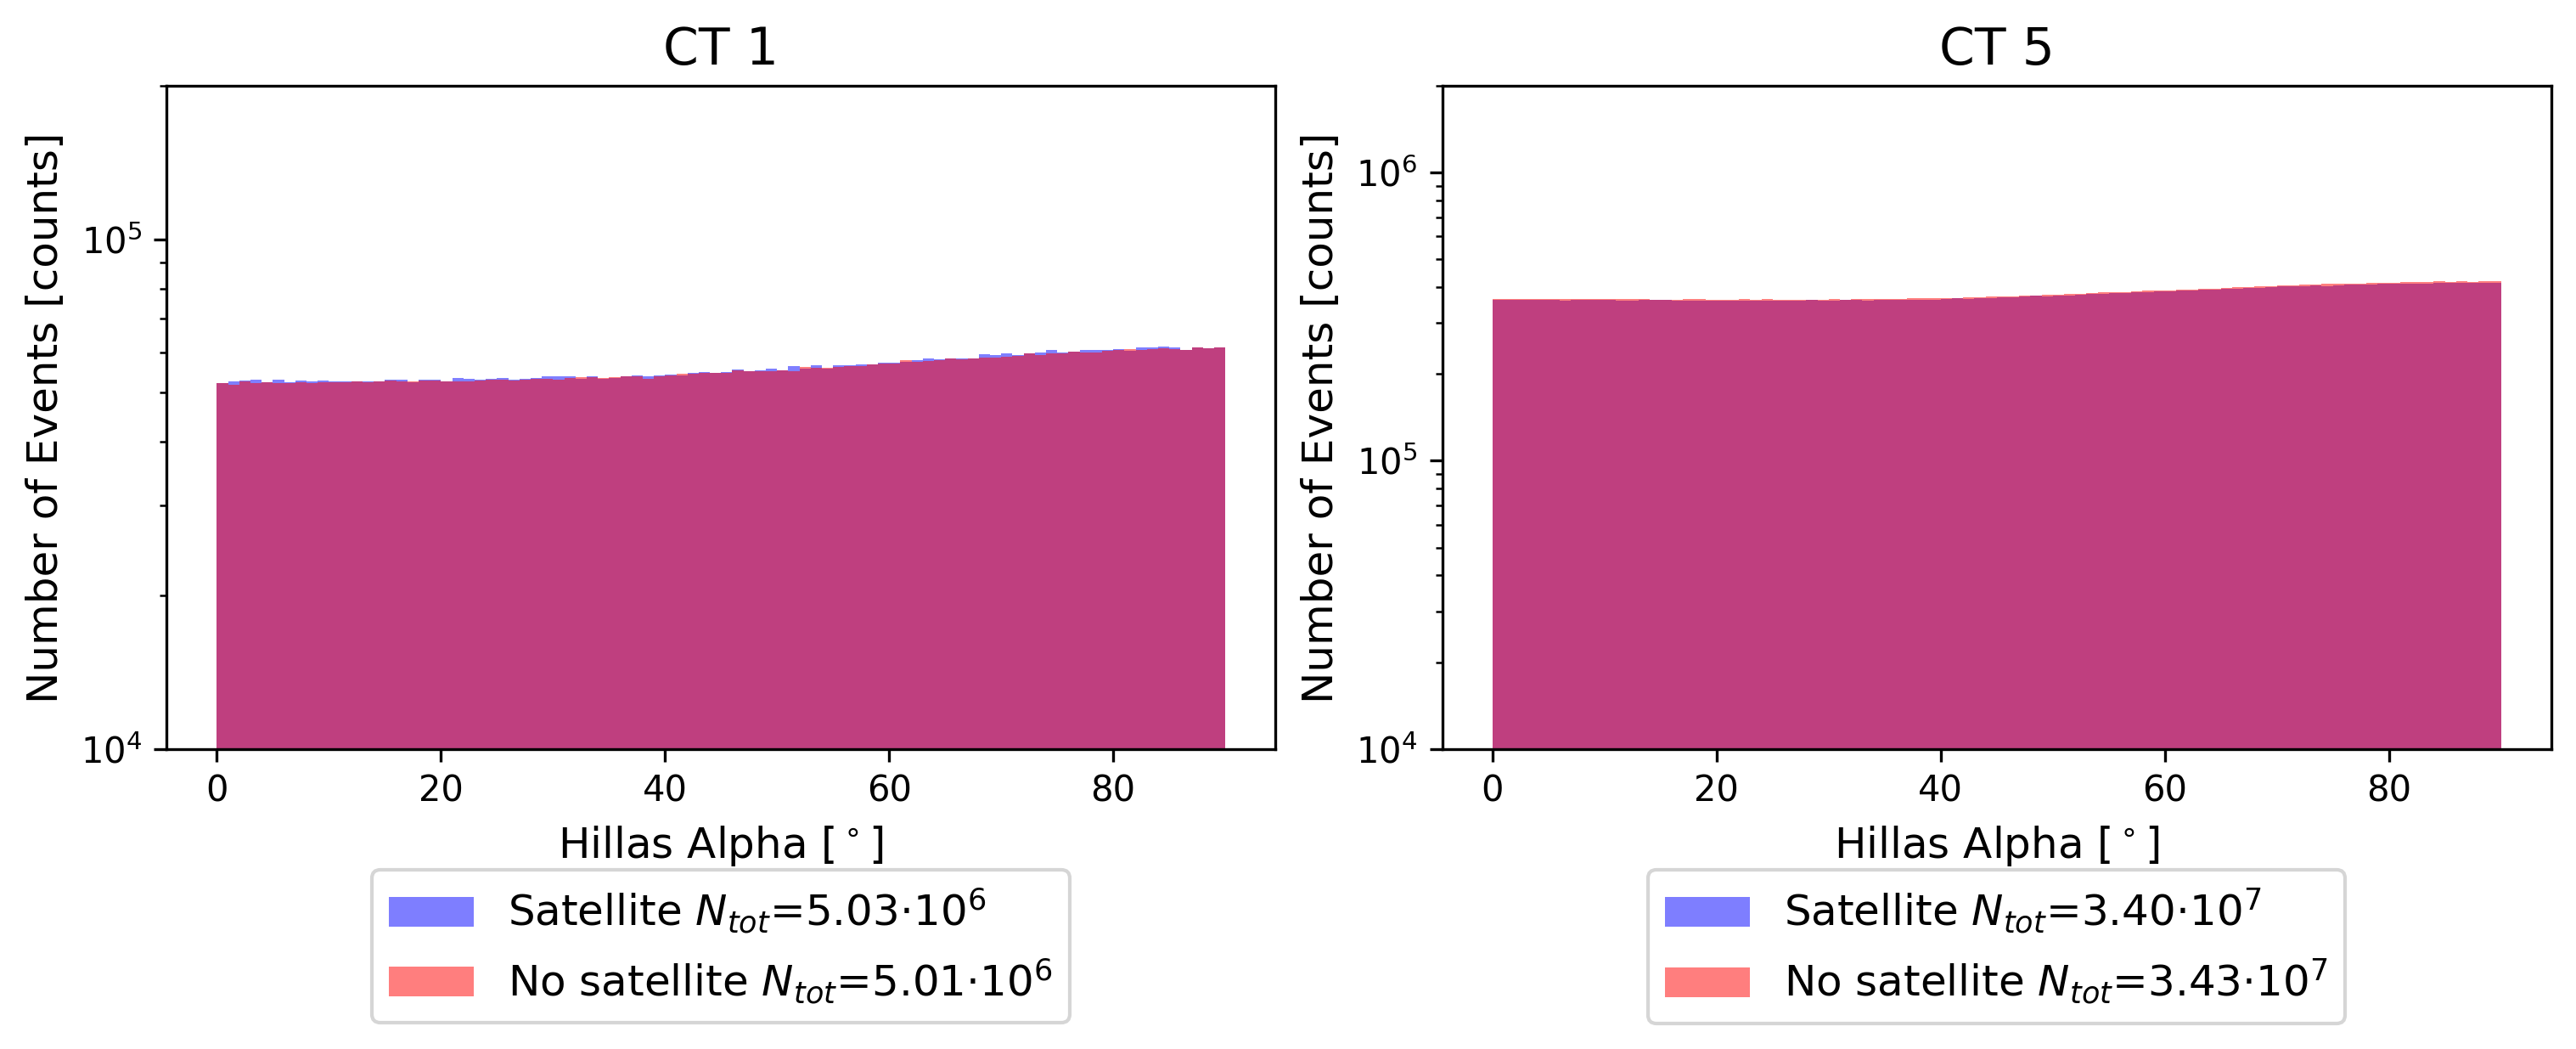

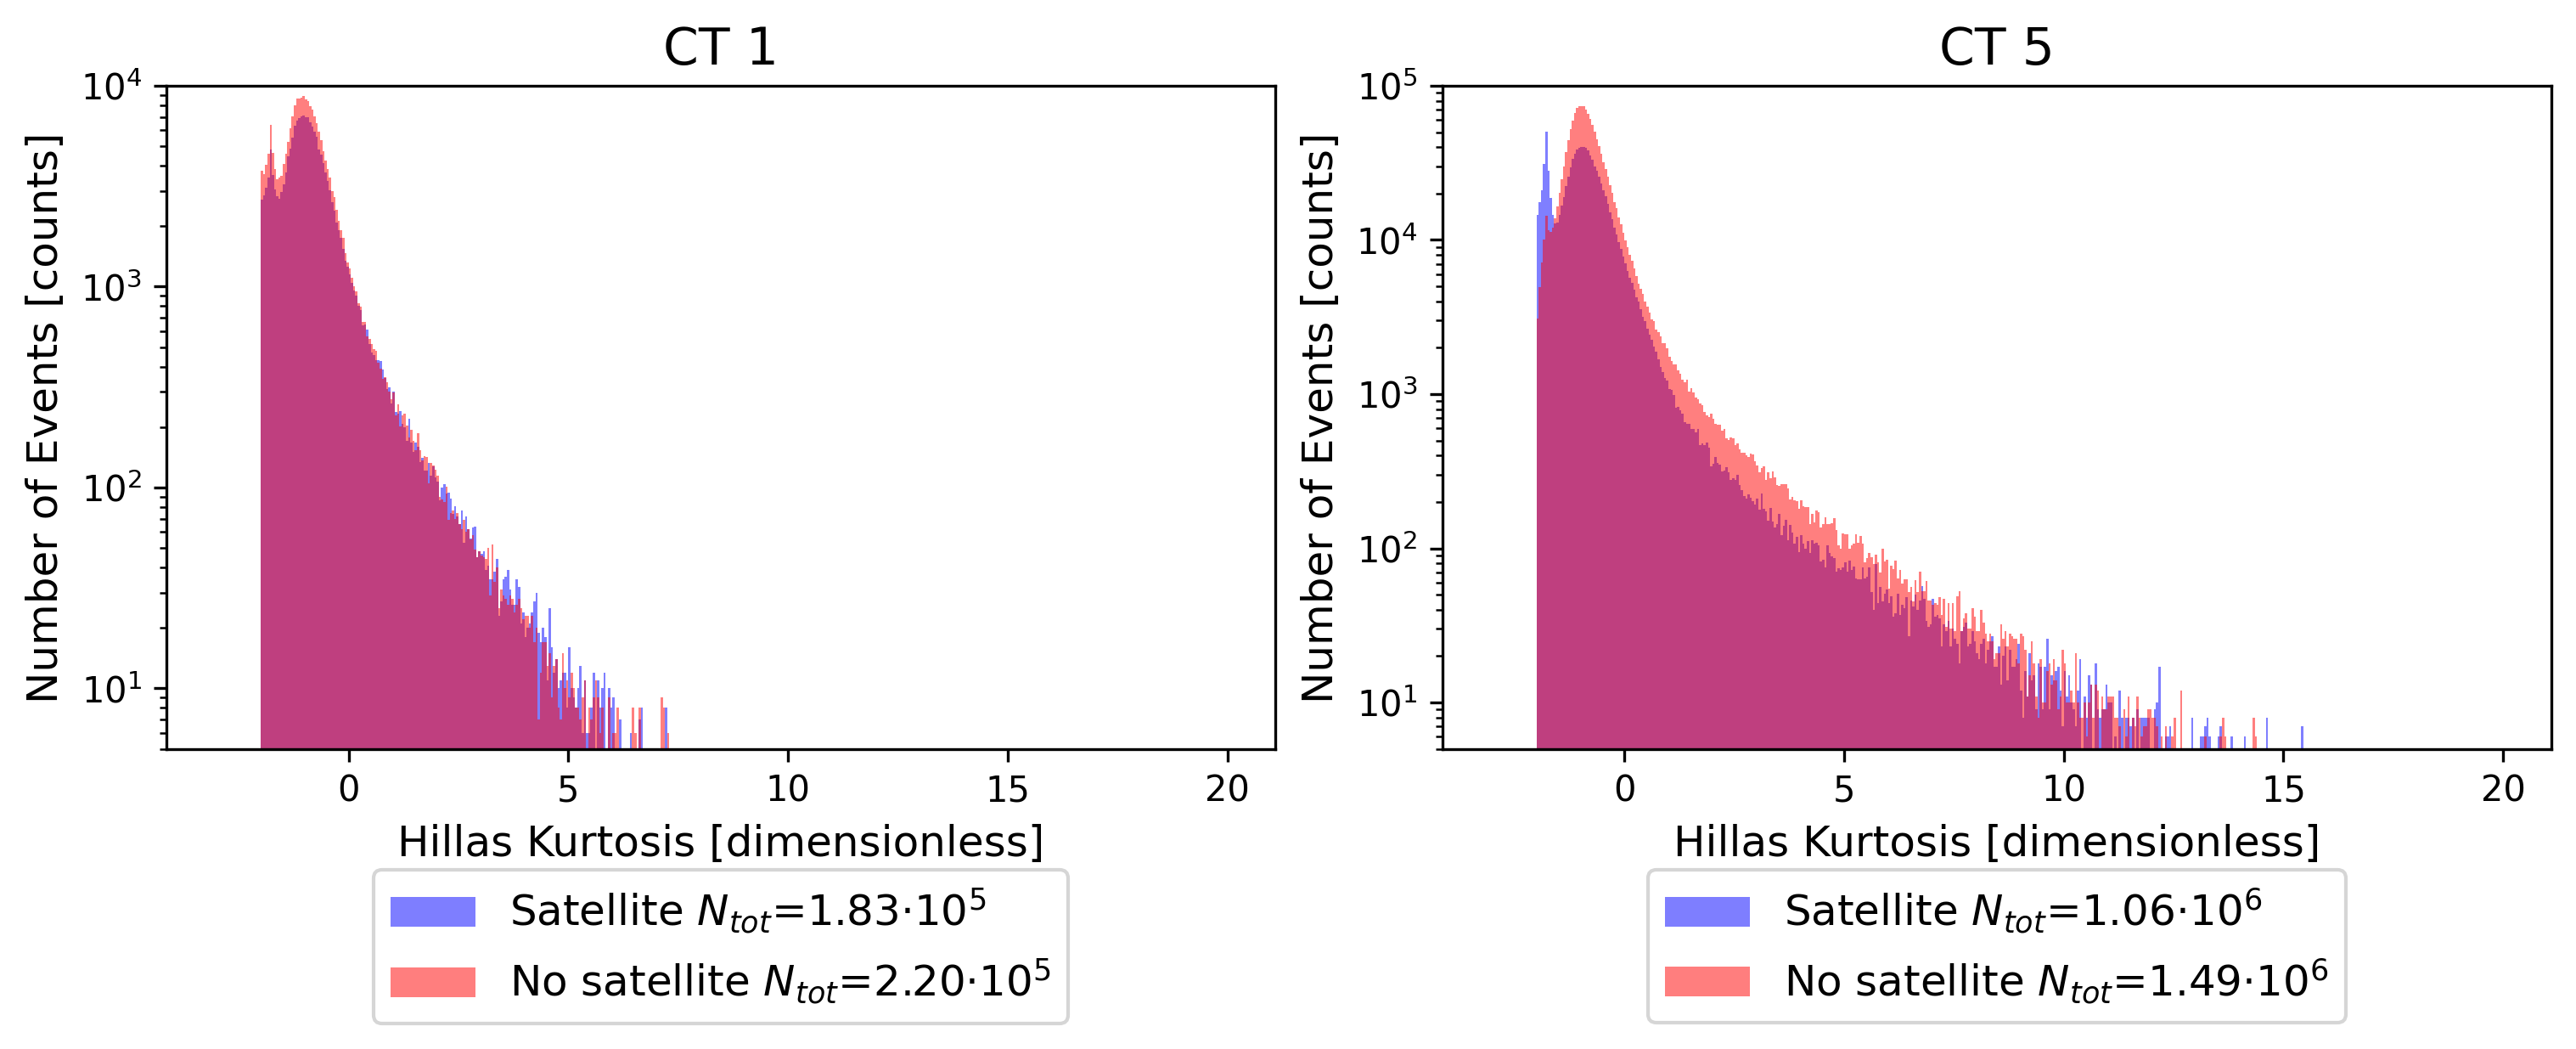

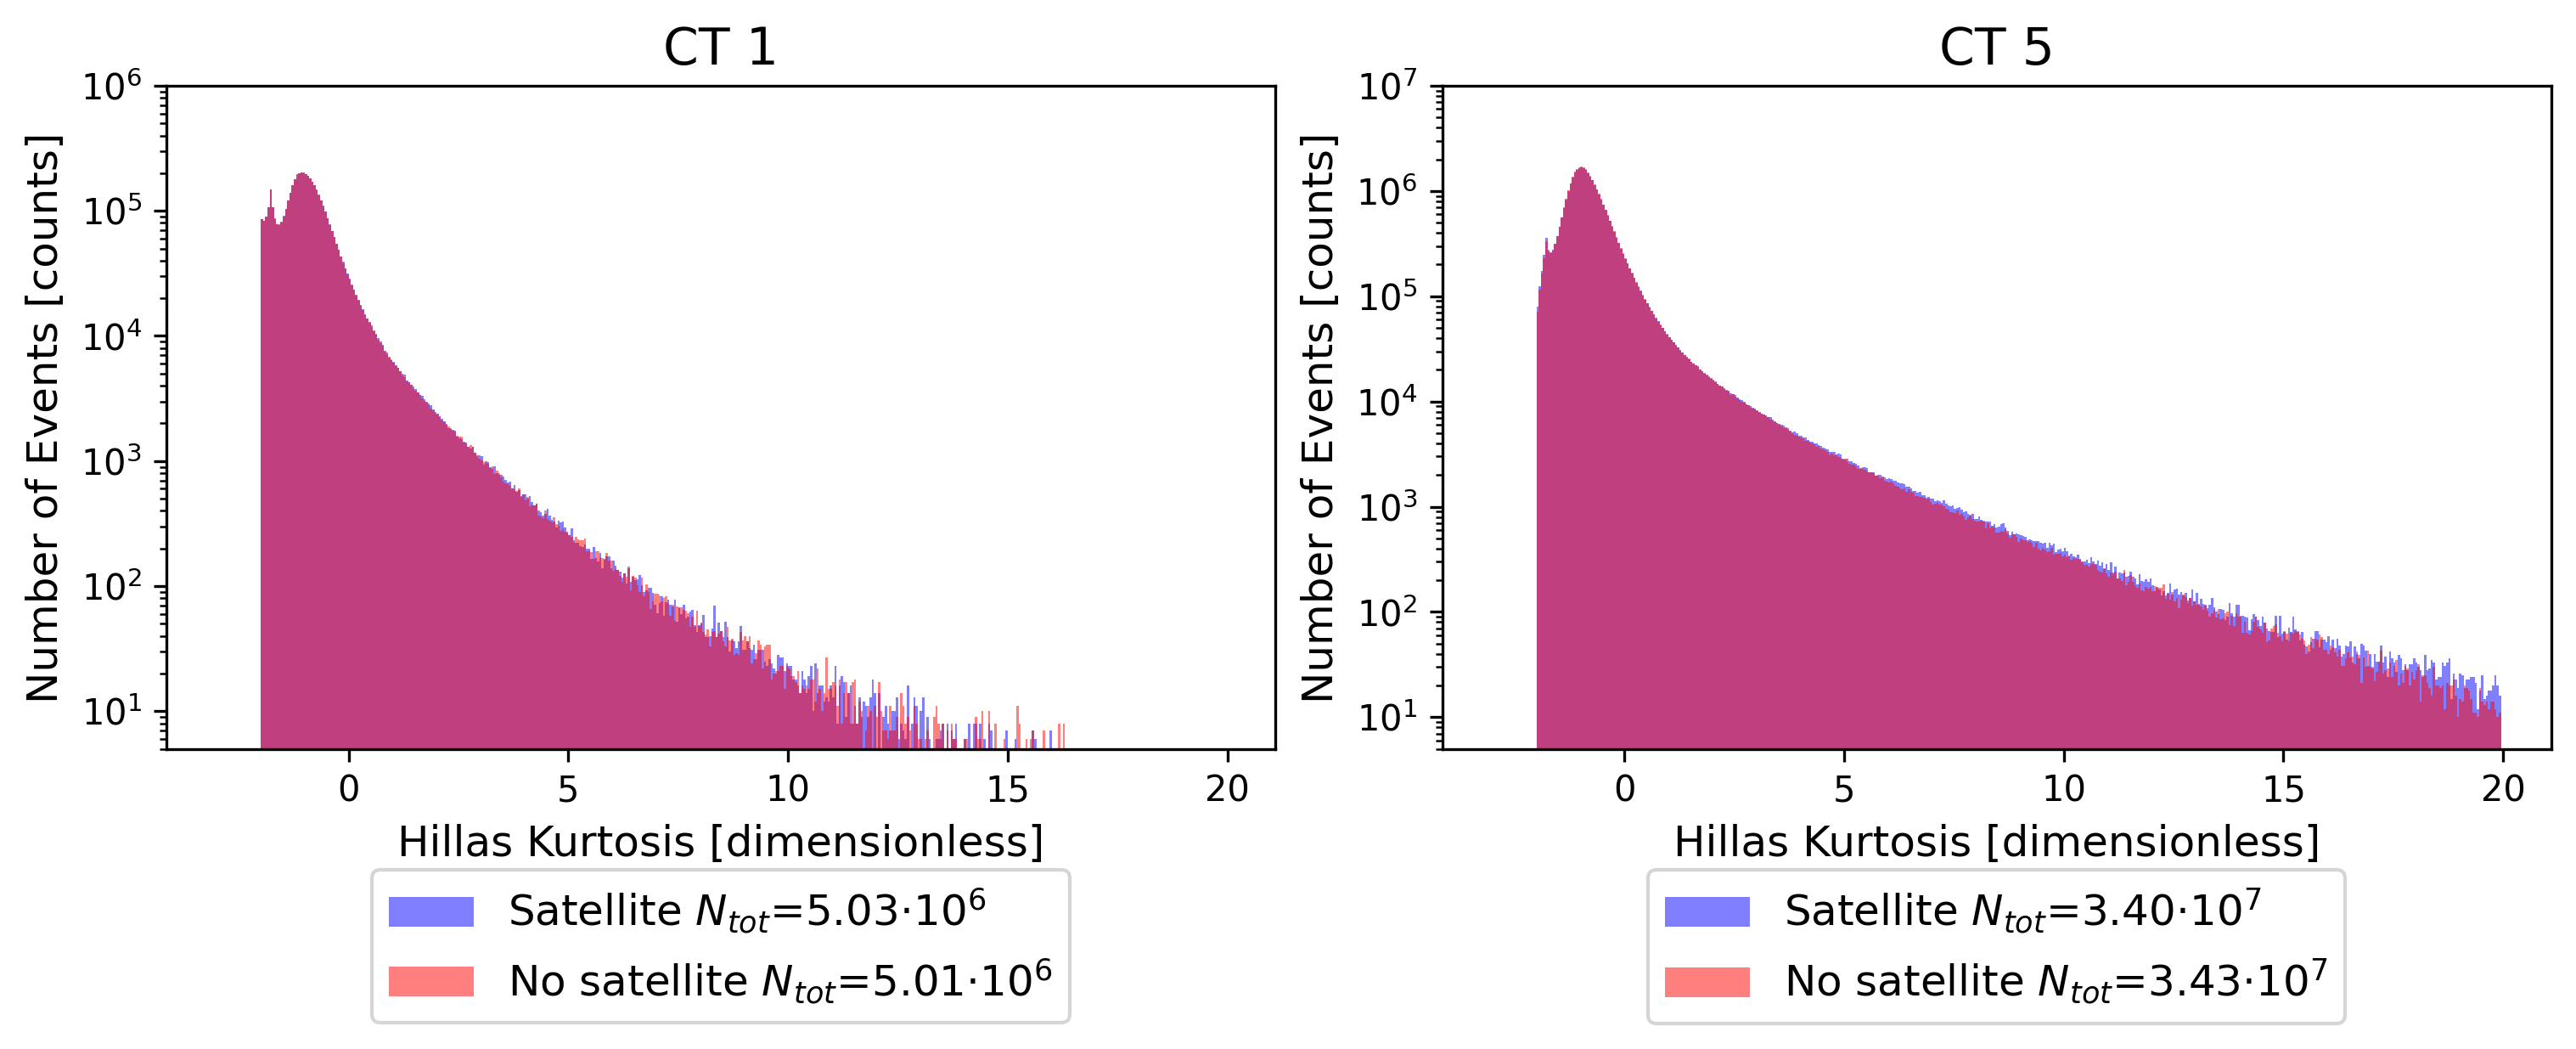

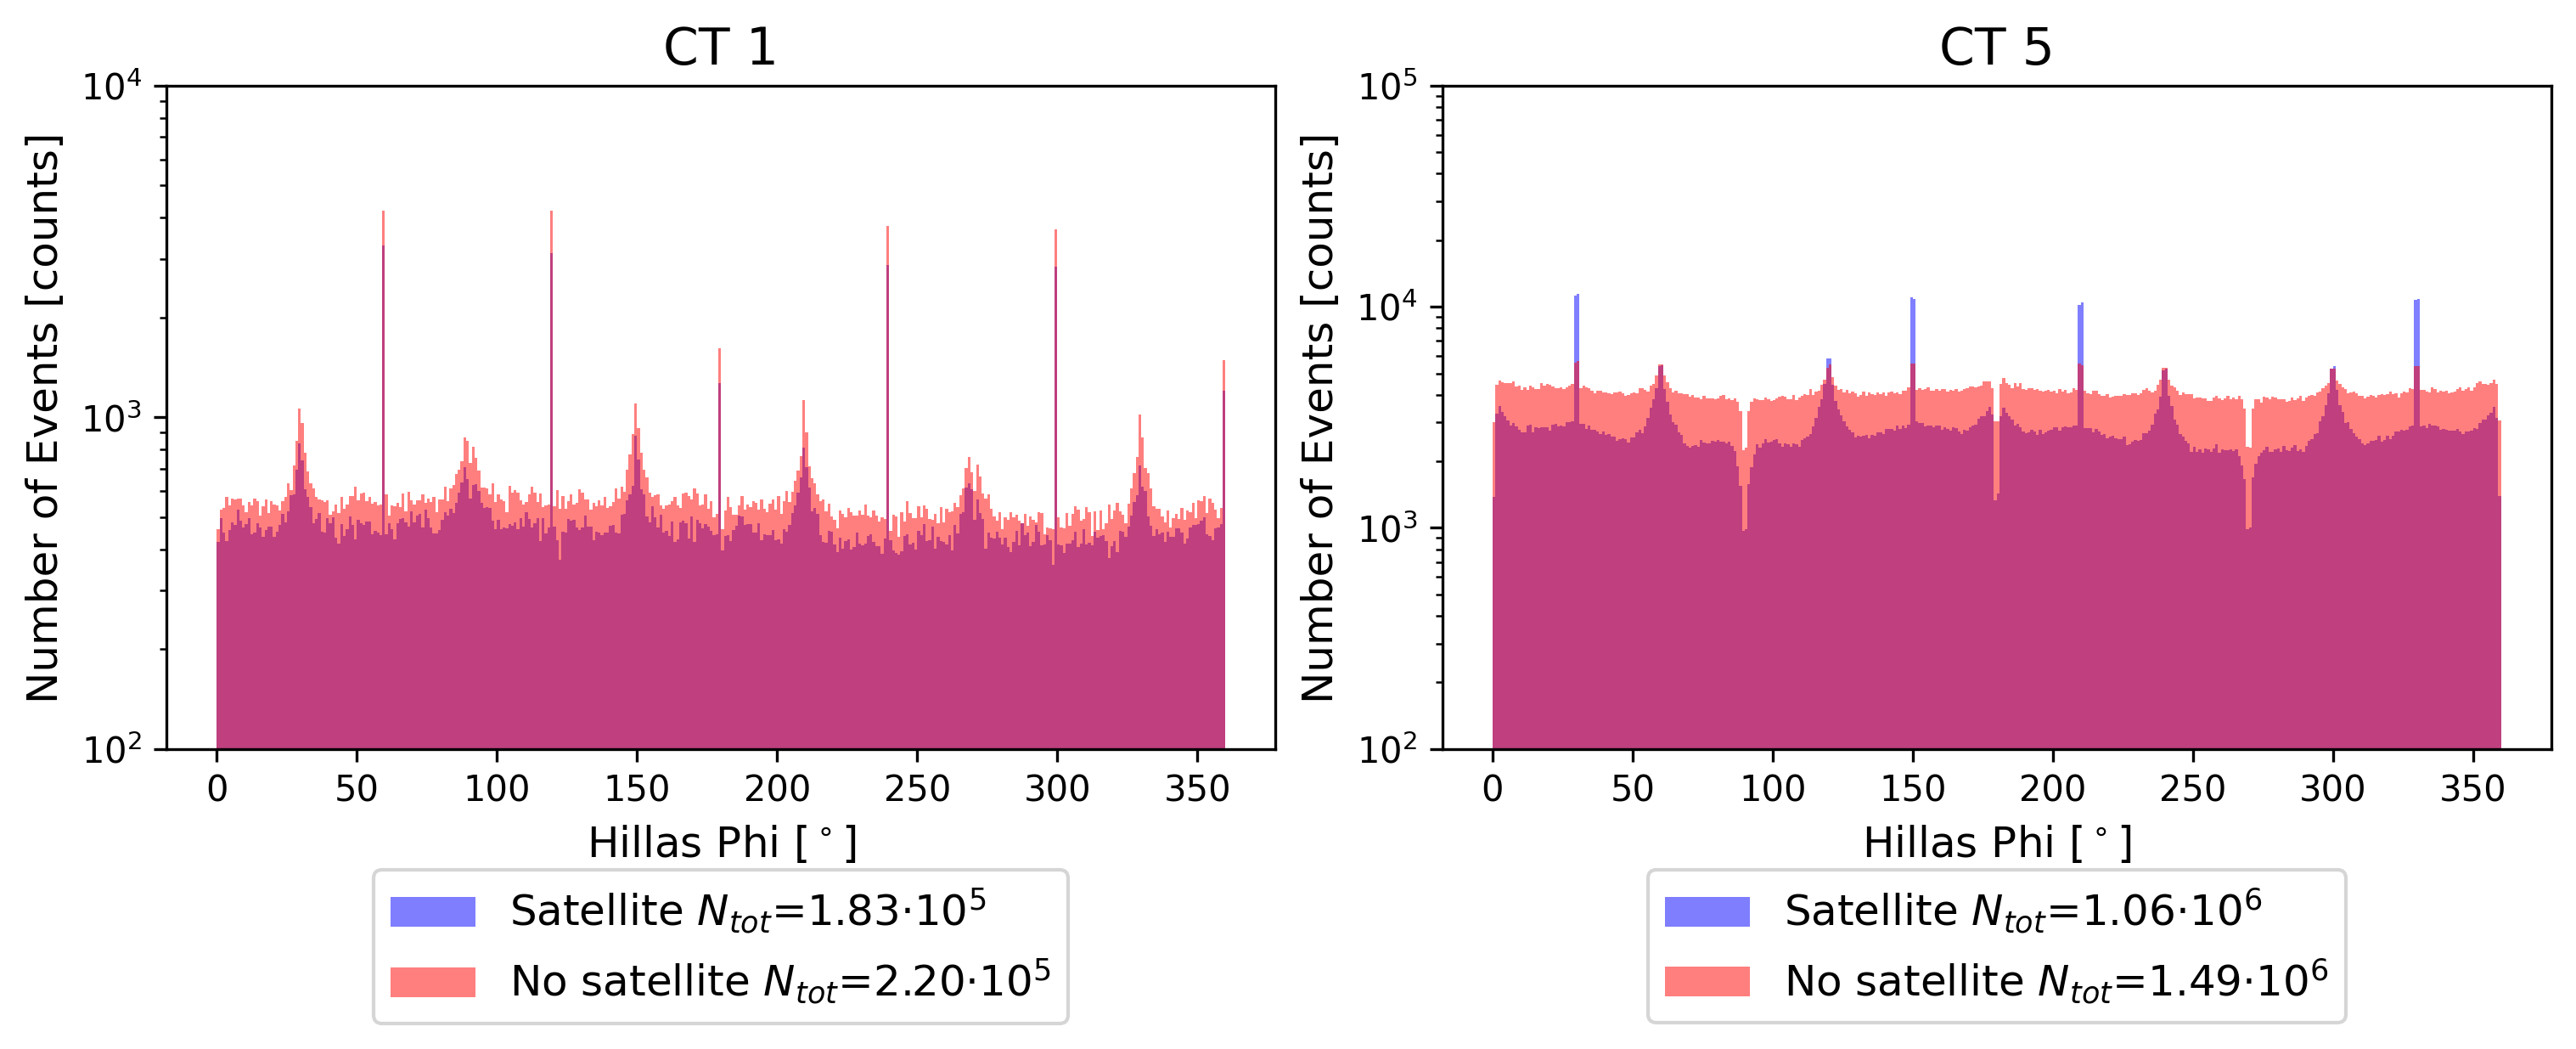

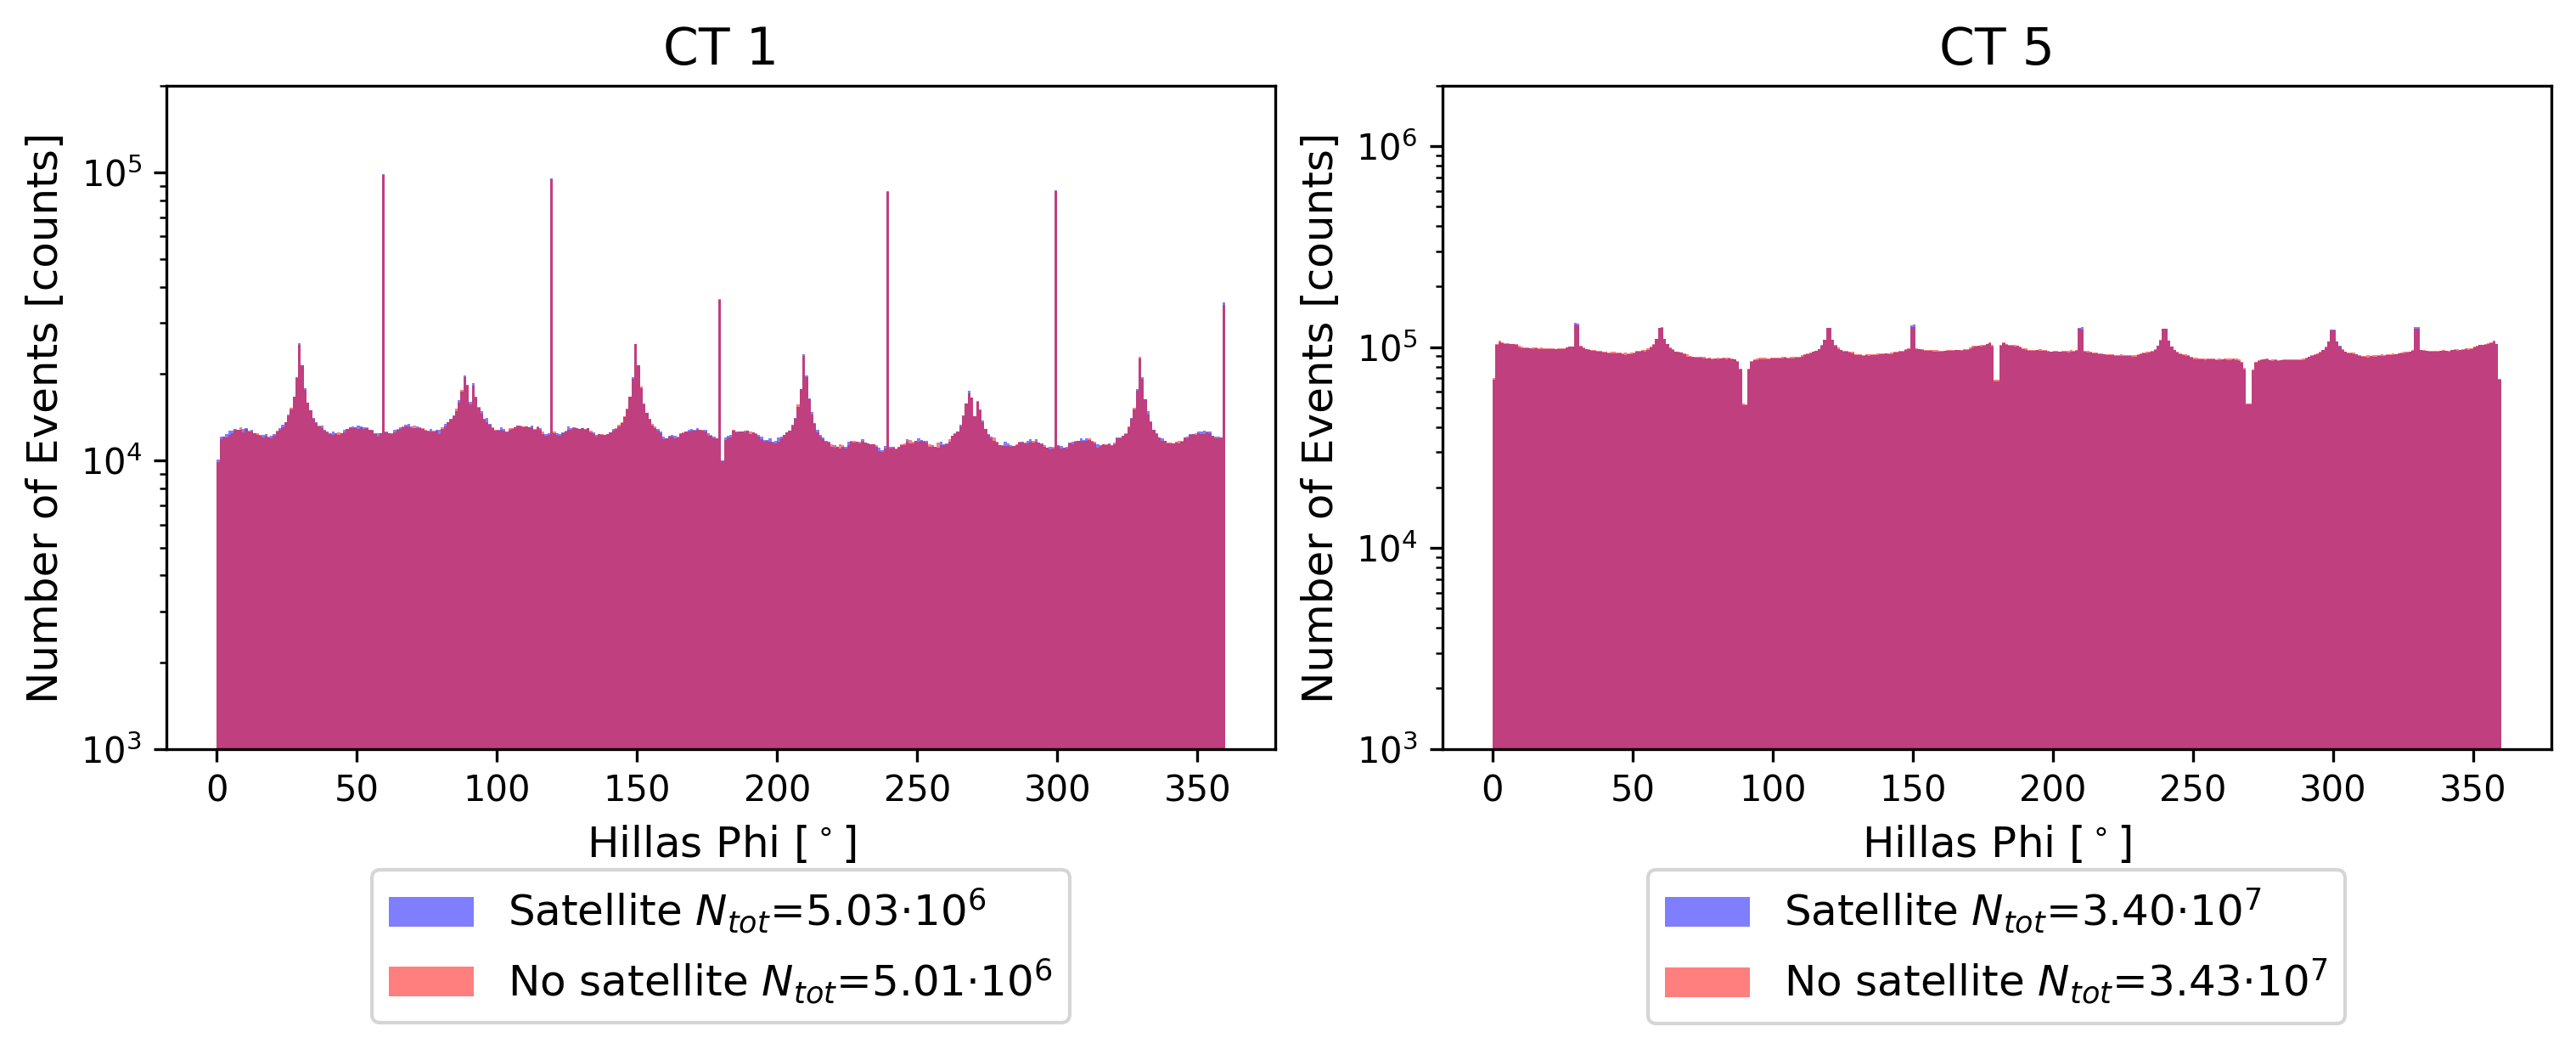

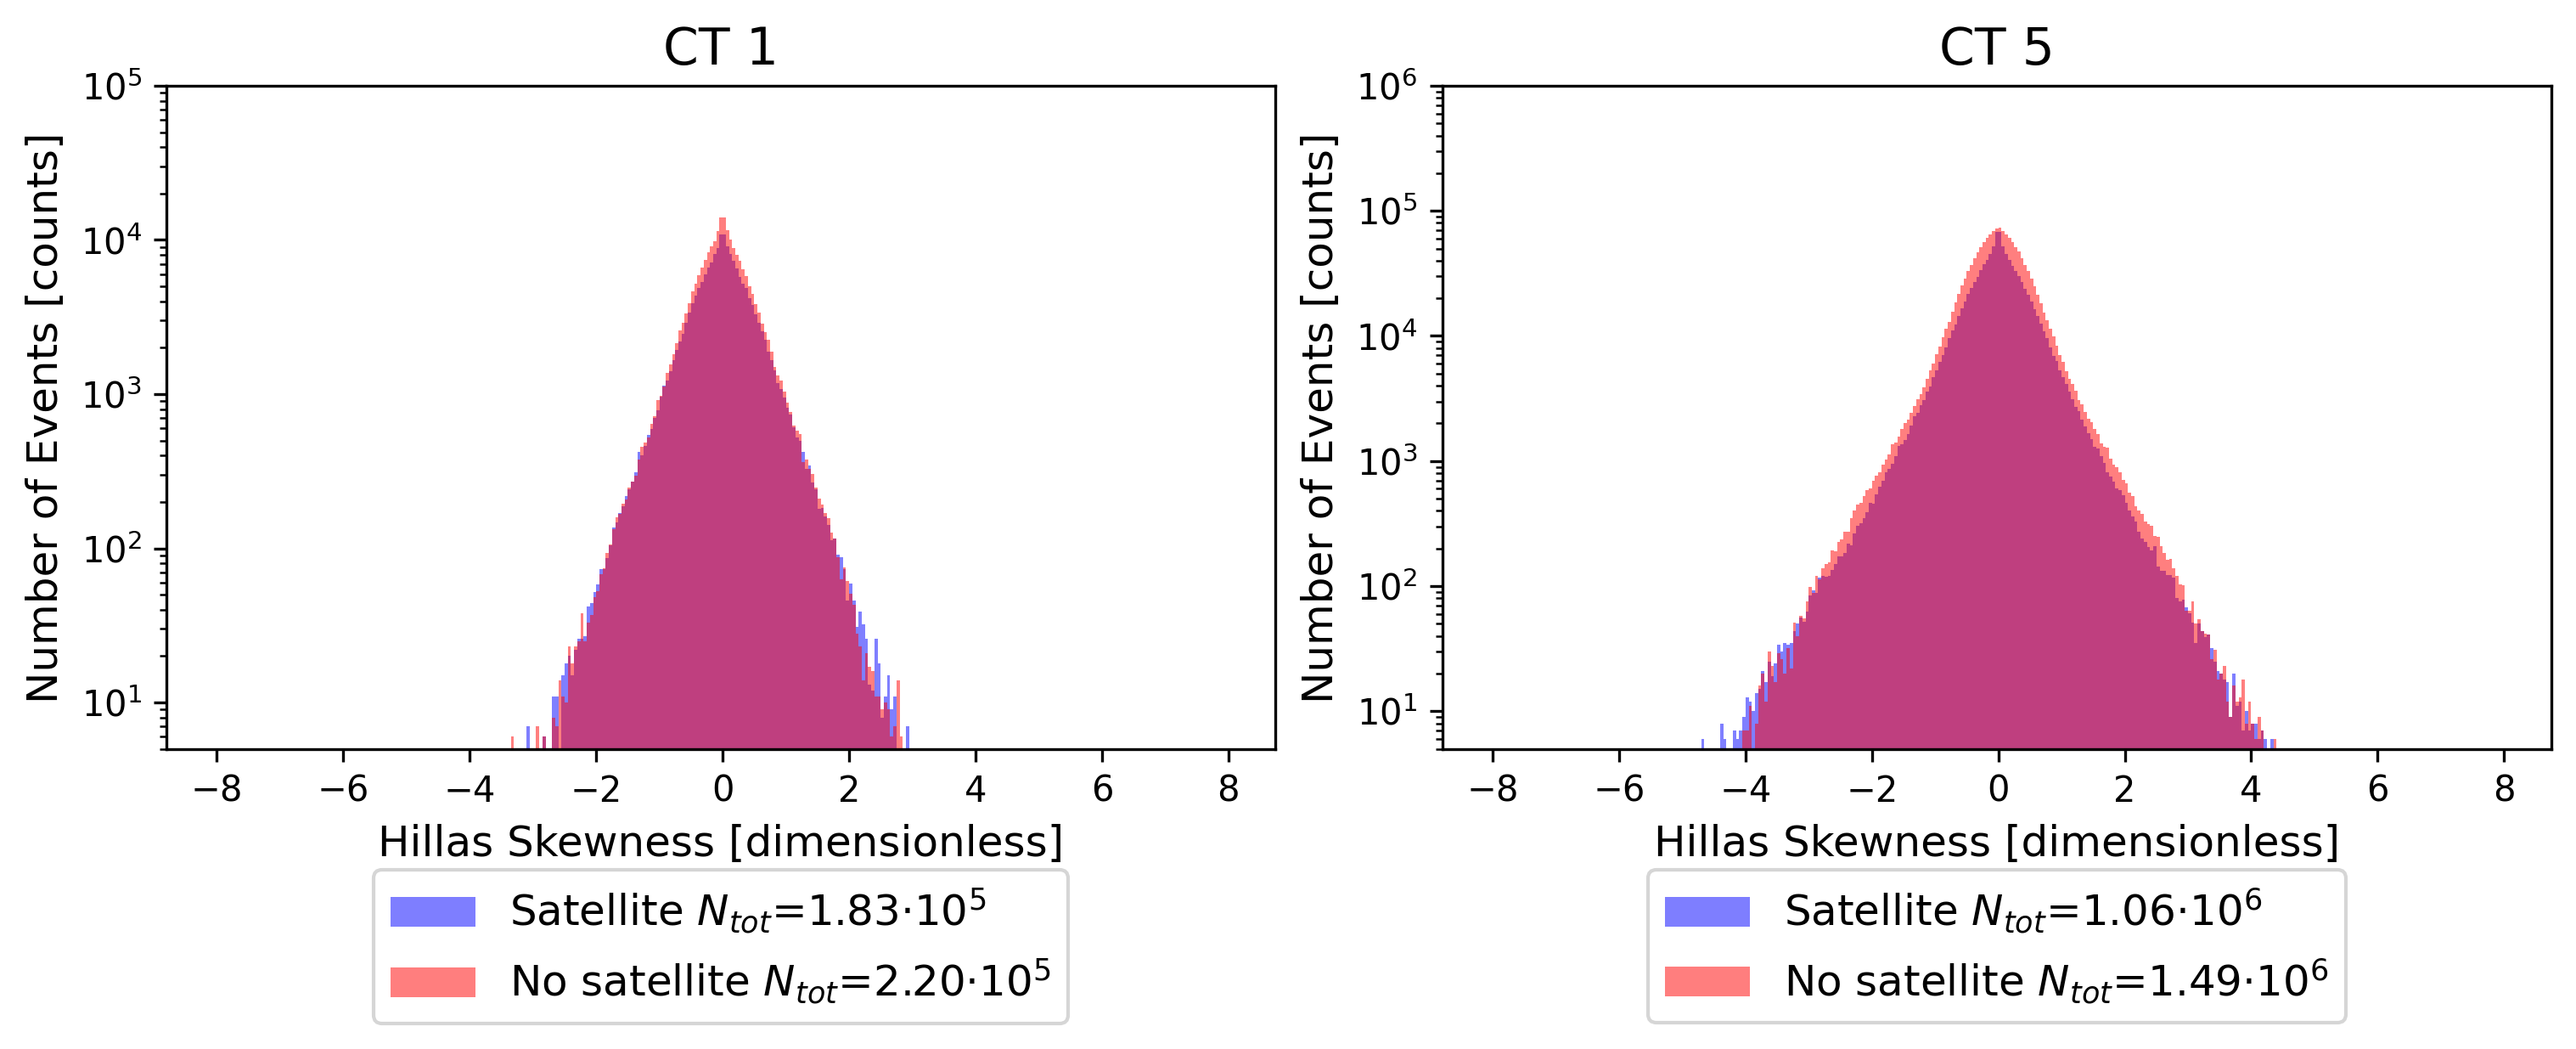

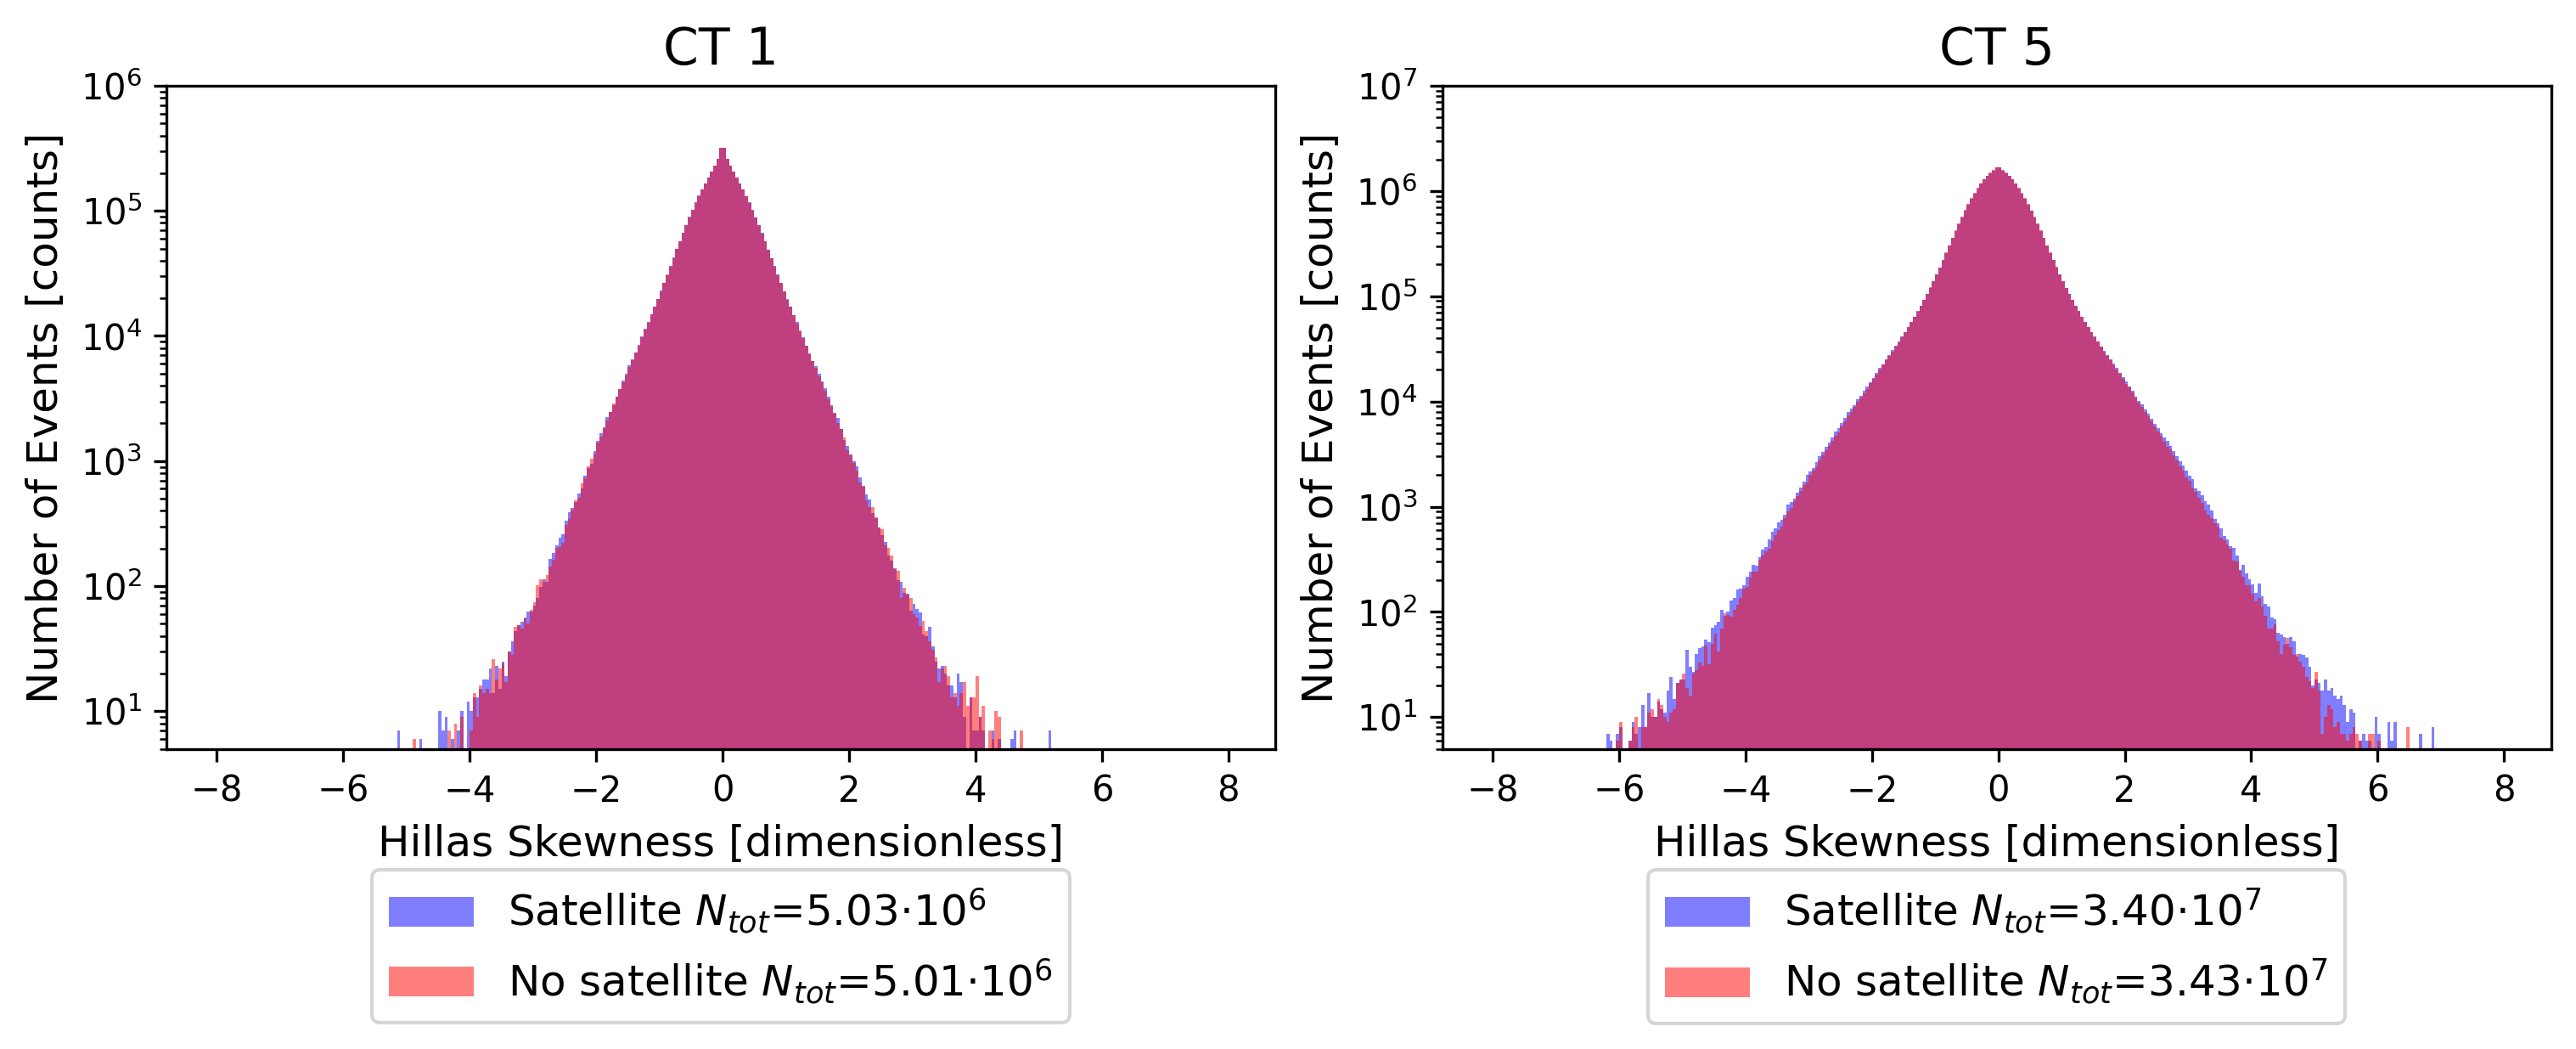

In [51]:


Xlabel = {}
Xlabel["amps"] = "Hillas Amplitude [p.e.]"
Xlabel["lengths"] = "Hillas Length [rad]"
Xlabel["widths"] = "Hillas Width [rad]"
Xlabel["skewness"] = "Hillas Skewness [dimensionless]"
Xlabel["kurtosis"] = "Hillas Kurtosis [dimensionless]"
Xlabel["alphas"] = "Hillas Alpha [$^\circ$]"
Xlabel["phis"] = "Hillas Phi [$^\circ$]"

Ylabel = "Number of Events [counts]"

min_ylim = {}
min_ylim["amps"] = 10
min_ylim["lengths"] = 1
min_ylim["widths"] = 1
min_ylim["skewness"] = 5 
min_ylim["kurtosis"] = 5
min_ylim["alphas"] = 1000
min_ylim["phis"] = 100

max_ylim = {}
max_ylim["amps"] = 10000
max_ylim["lengths"] = 20000
max_ylim["widths"] = 20000
max_ylim["skewness"] = 100000
max_ylim["kurtosis"] = 10000
max_ylim["alphas"] = 20000
max_ylim["phis"] = 10000


min_ylim_dim = {}
min_ylim_dim["amps"] = 100
min_ylim_dim["lengths"] = 1
min_ylim_dim["widths"] = 1
min_ylim_dim["skewness"] = 5
min_ylim_dim["kurtosis"] = 5
min_ylim_dim["alphas"] = 10000
min_ylim_dim["phis"] = 1000

max_ylim_dim = {}
max_ylim_dim["amps"] = 100000
max_ylim_dim["lengths"] = 500000
max_ylim_dim["widths"] = 10000000
max_ylim_dim["skewness"] = 1000000
max_ylim_dim["kurtosis"] = 1000000
max_ylim_dim["alphas"] = 200000
max_ylim_dim["phis"] = 200000




#plot only log
for param in ["amps", "lengths", "widths"]:
    a_1 = data_bright[param]["1"]["around_log"]
    a_5 = data_bright[param]["5"]["around_log"]
    d_1 = data_bright[param]["1"]["during_log"]
    d_5 = data_bright[param]["5"]["during_log"]
    bins_1 = data_bright[param]["1"]["bins_log"]
    bins_5 = data_bright[param]["5"]["bins_log"]
    bins_1_avg = (bins_1[1:]+bins_1[:-1])/2
    bins_5_avg = (bins_5[1:]+bins_5[:-1])/2
    #
    a_1_dim = data_dim[param]["1"]["around_log"]
    a_5_dim = data_dim[param]["5"]["around_log"]
    d_1_dim = data_dim[param]["1"]["during_log"]
    d_5_dim = data_dim[param]["5"]["during_log"]
    bins_1_dim = data_dim[param]["1"]["bins_log"]
    bins_5_dim = data_dim[param]["5"]["bins_log"]
    bins_1_dim_avg = (bins_1_dim[1:]+bins_1_dim[:-1])/2
    bins_5_dim_avg = (bins_5_dim[1:]+bins_5_dim[:-1])/2
    if param == "amps":
        N_tot_d_1 = "{:.2e}".format(np.sum(d_1)).split("e+")
        N_tot_a_1 = "{:.2e}".format(np.sum(a_1)).split("e+")
        N_tot_d_5 = "{:.2e}".format(np.sum(d_5)).split("e+")
        N_tot_a_5 = "{:.2e}".format(np.sum(a_5)).split("e+")    
        N_tot_d_1_dim = "{:.2e}".format(np.sum(d_1_dim)).split("e+")
        N_tot_a_1_dim = "{:.2e}".format(np.sum(a_1_dim)).split("e+")
        N_tot_d_5_dim = "{:.2e}".format(np.sum(d_5_dim)).split("e+")
        N_tot_a_5_dim = "{:.2e}".format(np.sum(a_5_dim)).split("e+")
    figure_size = (10,4)
    fig, (ax1,ax5) = plt.subplots(1,2, figsize = figure_size, 
                                  constrained_layout = True)
    fig_dim, (ax1_dim,ax5_dim) = plt.subplots(1,2, figsize = figure_size, 
                                              constrained_layout = True)
    ax1.bar(bins_1_avg, d_1, width = bins_1[1:]-bins_1[:-1], alpha = 0.5, color = "blue",
            label = "Satellite $N_{tot}$=" +N_tot_d_1[0]+
            "$\cdot 10^{:.0f}$".format(int(N_tot_d_1[1])))
    ax1.bar(bins_1_avg, a_1, width = bins_1[1:]-bins_1[:-1], alpha = 0.5, color = "red",
            label = "No satellite $N_{tot}$=" +N_tot_a_1[0]+
            "$\cdot 10^{:.0f}$".format(int(N_tot_a_1[1])))
    ax5.bar(bins_5_avg, d_5, width = bins_5[1:]-bins_5[:-1], alpha = 0.5, color = "blue",
            label = "Satellite $N_{tot}$=" +N_tot_d_5[0]+
            "$\cdot 10^{:.0f}$".format(int(N_tot_d_5[1])))
    ax5.bar(bins_5_avg, a_5, width = bins_5[1:]-bins_5[:-1], alpha = 0.5, color = "red",
            label = "No satellite $N_{tot}$=" +N_tot_a_5[0]+
            "$\cdot 10^{:.0f}$".format(int(N_tot_a_5[1])))
    ax1_dim.bar(bins_1_dim_avg, d_1_dim, width = bins_1_dim[1:]-bins_1_dim[:-1], 
                alpha = 0.5, color = "blue",
                label = "Satellite $N_{tot}$=" +N_tot_d_1_dim[0]+ 
                "$\cdot 10^{:.0f}$".format(int(N_tot_d_1_dim[1])))
    ax1_dim.bar(bins_1_dim_avg, a_1_dim, width = bins_1_dim[1:]-bins_1_dim[:-1], 
                alpha = 0.5, color = "red",
                label = "No satellite $N_{tot}$=" +N_tot_a_1_dim[0]+
                "$\cdot 10^{:.0f}$".format(int(N_tot_a_1_dim[1])))
    ax5_dim.bar(bins_5_dim_avg, d_5_dim, width = bins_5_dim[1:]-bins_5_dim[:-1], 
                alpha = 0.5, color = "blue",
                label = "Satellite $N_{tot}$=" +N_tot_d_5_dim[0]+
                "$\cdot 10^{:.0f}$".format(int(N_tot_d_5_dim[1])))
    ax5_dim.bar(bins_5_dim_avg, a_5_dim, width = bins_5_dim[1:]-bins_5_dim[:-1], 
                alpha = 0.5, color = "red",
                label = "No satellite $N_{tot}$=" +N_tot_a_5_dim[0]+
                "$\cdot 10^{:.0f}$".format(int(N_tot_a_5_dim[1])))
    ax1.set_xlabel(Xlabel[param])
    ax5.set_xlabel(Xlabel[param])
    ax1.set_ylabel(Ylabel)
    ax5.set_ylabel(Ylabel)
    yticks_1 = np.logspace(1,int(np.log10(np.max(a_1_dim)))+1, int(np.log10(np.max(a_1_dim)))+1).astype(int)
    yticks_5 = np.logspace(1,int(np.log10(np.max(a_5_dim)))+1, int(np.log10(np.max(a_5_dim)))+1).astype(int)
    xticks = np.array([10,20,50,100,200,500,1000,2000,5000])
    if param !="amps":
        xticks = xticks/10**5
    ax1.loglog()    
    ax1_dim.loglog()
    ax5.loglog()
    ax5_dim.loglog()
    if param == "amps":
        ax1.set_xlim((xticks[0], np.max(bins_1)))
        ax5.set_xlim((xticks[0], np.max(bins_5)))
        ax1_dim.set_xlim((xticks[0], np.max(bins_1_dim)))
        ax5_dim.set_xlim((xticks[0], np.max(bins_5_dim)))
    if param == "lengths":
        ax1.set_xlim((0.0005, 0.1))
        ax5.set_xlim((0.0001, 0.1))
        ax1_dim.set_xlim((0.0005, 0.1))
        ax5_dim.set_xlim((0.0001, 0.1))
    ax1.set_ylim((min_ylim[param],max_ylim[param]))
    ax5.set_ylim((min_ylim[param],max_ylim[param]*10))
    ax1_dim.set_ylim((min_ylim_dim[param],max_ylim_dim[param]))
    ax5_dim.set_ylim((min_ylim_dim[param],max_ylim_dim[param]*10))
    if param == "amps":
        ax1.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter(useOffset =True))
        ax5.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter(useOffset =True))
        ax1_dim.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter(useOffset =True))
        ax5_dim.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter(useOffset =True))
    ax1_dim.set_xlabel(Xlabel[param])
    ax5_dim.set_xlabel(Xlabel[param])
    ax1_dim.set_ylabel(Ylabel)
    ax5_dim.set_ylabel(Ylabel)
    ax1.set_title("CT 1")
    ax5.set_title("CT 5")
    ax1_dim.set_title("CT 1")
    ax5_dim.set_title("CT 5")
    if param == "amps":
        ax1.axvline(x = 60, color = 'black', label = 'ImPACT hybrid analysis cutoff 60 p.e.')
        ax5.axvline(x = 80, color = 'black', label = 'ImPACT hybrid analysis cutoff 80 p.e.')
        ax1_dim.axvline(x = 60, color = 'black', label = 'ImPACT hybrid analysis cutoff 60 p.e.')
        ax5_dim.axvline(x = 80, color = 'black', label = 'ImPACT hybrid analysis cutoff 80 p.e.')
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines5, labels5 = ax5.get_legend_handles_labels()
    lines1_dim, labels1_dim = ax1_dim.get_legend_handles_labels()
    lines5_dim, labels5_dim = ax5_dim.get_legend_handles_labels()
    if param == "amps":
        ax1.legend(lines1[1:]+lines1[:1], labels1[1:]+labels1[:1], loc='upper center', 
                   bbox_to_anchor=(0.5, -0.18), fancybox=True, ncol=1)
        ax5.legend(lines5[1:]+lines5[:1], labels5[1:]+labels5[:1], loc='upper center', 
                   bbox_to_anchor=(0.5, -0.18), fancybox=True, ncol=1)
        ax1_dim.legend(lines1_dim[1:]+lines1_dim[:1], labels1_dim[1:]+labels1_dim[:1], loc='upper center', 
                       bbox_to_anchor=(0.5, -0.18), fancybox=True, ncol=1)
        ax5_dim.legend(lines5_dim[1:]+lines5_dim[:1], labels5_dim[1:]+labels5_dim[:1], loc='upper center', 
                       bbox_to_anchor=(0.5, -0.18),fancybox=True, ncol=1)
    else:
        ax1.legend(lines1, labels1, loc='upper center', bbox_to_anchor=(0.5, -0.15),
                 fancybox=True, ncol=1)
        ax5.legend(lines5, labels5, loc='upper center', bbox_to_anchor=(0.5, -0.15),
                 fancybox=True, ncol=1)
        ax1_dim.legend(lines1_dim, labels1_dim, loc='upper center', bbox_to_anchor=(0.5, -0.15),
                 fancybox=True, ncol=1)
        ax5_dim.legend(lines5_dim, labels5_dim, loc='upper center', bbox_to_anchor=(0.5, -0.15),
                 fancybox=True, ncol=1)
    fig.savefig(os.path.join(path_to_plots,"CT1+CT5_"+param+"_over3000.jpg"))
    fig_dim.savefig(os.path.join(path_to_plots,"CT1+CT5_"+param+"_under3000.jpg"))

plt.show()


for param in hillas_params:
    if param in ["amps", "lengths", "widths"]:
        continue
    a_1 = data_bright[param]["1"]["around"]
    a_5 = data_bright[param]["5"]["around"]
    d_1 = data_bright[param]["1"]["during"]
    d_5 = data_bright[param]["5"]["during"]
    bins_1 = data_bright[param]["1"]["bins"]
    bins_5 = data_bright[param]["5"]["bins"]
    bins_1_avg = (bins_1[1:]+bins_1[:-1])/2
    bins_5_avg = (bins_5[1:]+bins_5[:-1])/2
    #
    a_1_dim = data_dim[param]["1"]["around"]
    a_5_dim = data_dim[param]["5"]["around"]
    d_1_dim = data_dim[param]["1"]["during"]
    d_5_dim = data_dim[param]["5"]["during"]
    bins_1_dim = data_dim[param]["1"]["bins"]
    bins_5_dim = data_dim[param]["5"]["bins"]
    bins_1_dim_avg = (bins_1_dim[1:]+bins_1_dim[:-1])/2
    bins_5_dim_avg = (bins_5_dim[1:]+bins_5_dim[:-1])/2
    figure_size = (10,4)
    fig, (ax1,ax5) = plt.subplots(1,2, figsize = figure_size,
                                  constrained_layout = True)
    fig_dim, (ax1_dim,ax5_dim) = plt.subplots(1,2, figsize = figure_size,
                                              constrained_layout = True)
    ax1.bar(bins_1_avg, d_1, width = bins_1[1:]-bins_1[:-1], alpha = 0.5, color = "blue",
            label = "Satellite $N_{tot}$=" +N_tot_d_1[0]+
            "$\cdot 10^{:.0f}$".format(int(N_tot_d_1[1])))
    ax1.bar(bins_1_avg, a_1, width = bins_1[1:]-bins_1[:-1], alpha = 0.5, color = "red",
            label = "No satellite $N_{tot}$=" +N_tot_a_1[0]+
            "$\cdot 10^{:.0f}$".format(int(N_tot_a_1[1])))
    ax5.bar(bins_5_avg, d_5, width = bins_5[1:]-bins_5[:-1], alpha = 0.5, color = "blue",
            label = "Satellite $N_{tot}$=" +N_tot_d_5[0]+
            "$\cdot 10^{:.0f}$".format(int(N_tot_d_5[1])))
    ax5.bar(bins_5_avg, a_5, width = bins_5[1:]-bins_5[:-1], alpha = 0.5, color = "red",
            label = "No satellite $N_{tot}$=" +N_tot_a_5[0]+
            "$\cdot 10^{:.0f}$".format(int(N_tot_a_5[1])))
    ax1_dim.bar(bins_1_dim_avg, d_1_dim, width = bins_1_dim[1:]-bins_1_dim[:-1],
                alpha = 0.5, color = "blue",
                label = "Satellite $N_{tot}$=" +N_tot_d_1_dim[0]+
                "$\cdot 10^{:.0f}$".format(int(N_tot_d_1_dim[1])))
    ax1_dim.bar(bins_1_dim_avg, a_1_dim, width = bins_1_dim[1:]-bins_1_dim[:-1],
                alpha = 0.5, color = "red",
                label = "No satellite $N_{tot}$=" +N_tot_a_1_dim[0]+
                "$\cdot 10^{:.0f}$".format(int(N_tot_a_1_dim[1])))
    ax5_dim.bar(bins_5_dim_avg, d_5_dim, width = bins_5_dim[1:]-bins_5_dim[:-1],
                alpha = 0.5, color = "blue",
                label = "Satellite $N_{tot}$=" +N_tot_d_5_dim[0]+
                "$\cdot 10^{:.0f}$".format(int(N_tot_d_5_dim[1])))
    ax5_dim.bar(bins_5_dim_avg, a_5_dim, width = bins_5_dim[1:]-bins_5_dim[:-1],
                alpha = 0.5, color = "red",
                label = "No satellite $N_{tot}$=" +N_tot_a_5_dim[0]+
                "$\cdot 10^{:.0f}$".format(int(N_tot_a_5_dim[1])))
#     ax1.legend()
#     ax5.legend()
#     ax1_dim.legend()
#     ax5_dim.legend()  
    ax5.set_yscale("log")
    ax1.set_yscale("log")
    ax1_dim.set_yscale("log")
    ax5_dim.set_yscale("log")
    ax1.set_ylim((min_ylim[param],max_ylim[param]))
    ax5.set_ylim((min_ylim[param],max_ylim[param]*10))
    ax1_dim.set_ylim((min_ylim_dim[param],max_ylim_dim[param]))
    ax5_dim.set_ylim((min_ylim_dim[param],max_ylim_dim[param]*10))
    ax1.set_xlabel(Xlabel[param])
    ax5.set_xlabel(Xlabel[param])
    ax1.set_ylabel(Ylabel)
    ax5.set_ylabel(Ylabel)
    ax1_dim.set_xlabel(Xlabel[param])
    ax5_dim.set_xlabel(Xlabel[param])
    ax1_dim.set_ylabel(Ylabel)
    ax5_dim.set_ylabel(Ylabel)
    ax1.set_title("CT 1")
    ax5.set_title("CT 5")
    ax1_dim.set_title("CT 1")
    ax5_dim.set_title("CT 5")
    '''
    ax1.yaxis.set_major_formatter(mpl.ticker.ScalarFormatter(useOffset =False))
    ax5.yaxis.set_major_formatter(mpl.ticker.ScalarFormatter(useOffset =False))
    ax1_dim.yaxis.set_major_formatter(mpl.ticker.ScalarFormatter(useOffset =False))
    ax5_dim.yaxis.set_major_formatter(mpl.ticker.ScalarFormatter(useOffset =False))
    ax1.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
    ax5.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
    ax1_dim.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
    ax5_dim.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
    yticks = []
    yticks_dim = []
    '''
    ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
             fancybox=True, ncol=1)
    ax5.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
             fancybox=True, ncol=1)
    ax1_dim.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
             fancybox=True, ncol=1)
    ax5_dim.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
             fancybox=True, ncol=1)
    fig.savefig(os.path.join(path_to_plots,"CT1+CT5_"+param+"_over3000.jpg"))
    fig_dim.savefig(os.path.join(path_to_plots,"CT1+CT5_"+param+"_under3000.jpg"))

plt.show()

['3.38', '07']